# Summary

**Screening on US stocks**

Screening Round 1 - Download the list of stock symbols for S&P 500 stocks
- Download the stock symbol from the wikipedia website by web scraping with BeautifulSoup
- Download the stock information from yahoo finance
- Result: 503 stock codes are downloaded for next round of screening


Screening Round 2 - Selection the stock with positive fundamental financial performance
Key financial factors:
- Profitability
	- Profit Margin
	- Operating Margin (ttm)
- Management Effectiveness
	- Return on Assets (ttm)
	- Return on Equity (ttm)
- Result: 427  stocks are filtered for next round of screening


Screening Round 3 - Selection the stock with positive stock price performance
- Beta > 1: outperform than the market in general
- Result: 234 stocks are filtered for next round of screening


Screening Round 4 - Selection the stock of stable companies with high market capitalization values
- Large caps tend to be more mature and stable companies that have already experienced a great deal of growth and that capture a large market share. Small caps tend to be more volatile although it may have potential growth opportunities.
- Pick up the top 200 stocks with highest market capitalization values
- Result: 200 stocks are filtered for next round of screening


Screening Round 5 - Selection the stock with high liquidity
- High levels of liquidity arise when there is a significant level of trading activity and when there is both high supply and demand for an asset, as it is easier to find a buyer or seller
- Adequate liquidity provides comfort that the stock can be bought or sold whenever the need arises.
- Pick up the top 100 stocks with highest turnover
- Result: 100 stocks are filtered for next round of screening



Screening Round 6 - Selection the stock with postive returns with reference to risk free data benchmark data
- alpha > 0: positive returns
- excess_returns > 0: positive returns
- expected_return_CAPM > 0: positive returns
- expected_annual_return_dailytrade > 0: positive returns
- stock_average_annual_return > 0: positive returns
- beta > 1: outperform than market
- probability_of_positive_day > 0.5: higher probability than random guess to get positive returns
- Result: 28 stocks are filtered for next round of pairing and backtesting


**Screening on HK stocks**

Screening Round 1 - Download the list of stock symbols for HK Main Equity market
- Download the stock symbol from the HKEX portal
- 13068 HK Securites are downloaded from https://www.hkex.com.hk/eng/services/trading/securities/securitieslists/ListOfSecurities.xlsx
- 2301 stocks are filtered from HK Equity Main market
  Download the stock information from yahoo finance
- Result: 2301 stock codes are downloaded for next round of screening


Screening Round 2 - Selection the stock with positive fundamental financial performance
Key financial factors:
- Profitability
	- Profit Margin
	- Operating Margin (ttm)
- Management Effectiveness
	- Return on Assets (ttm)
	- Return on Equity (ttm)
- Result: 1092  stocks are filtered for next round of screening


Screening Round 3 - Selection the stock with positive stock price performance
- Beta > 1: outperform than the market in general
- Result: 142  stocks are filtered for next round of screening


Screening Round 4 - Selection the stock of stable companies with high market capitalization values
- Large caps tend to be more mature and stable companies that have already experienced a great deal of growth and that capture a large market share. Small caps tend to be more volatile although it may have potential growth opportunities.
- Pick up the top 200 stocks with highest market capitalization values
- Result: 142  stocks are filtered for next round of screening


Screening Round 5 - Selection the stock with high liquidity
- High levels of liquidity arise when there is a significant level of trading activity and when there is both high supply and demand for an asset, as it is easier to find a buyer or seller
- Adequate liquidity provides comfort that the stock can be bought or sold whenever the need arises.
- Pick up the top 100 stocks with highest turnover
- Result: 100 stocks are filtered for next round of screening


Screening Round 6 - Selection the stock with postive returns with reference to risk free data benchmark data
- alpha > 0: positive returns
- beta > 1: outperform than market
- probability_of_positive_day > 0.5: higher probability than random guess to get positive returns
- Result: 13 stocks are filtered for next round of pairing and backtesting

# **Coding**

# Preparations

# Install packages

In [1]:
!pip install stock-pairs-trading

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 5.0 MB/s eta 0:00:00


# Import modules

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

import time
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

import re
import requests
from bs4 import BeautifulSoup

In [3]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [5]:
import statsmodels
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

In [6]:
from pprint import pprint
from stock_pairs_trading import StockPairsTrading

# Define assumptions and declare variables

In [7]:
FIGSIZEX = 12
FIGSIZEY = 6

COINT_PVALUE = 0.05

# Define the confidence level for VaR (Value at Risk) calculation
VaR_CONFIDENCE_LEVEL = 0.95
VaR_ALPHA = 5

TOP_nStock = 5

In [8]:
# start_date = '2022-01-01'
# end_date = '2023-12-31'

end_date = date.today()
# end_date = date.today() + relativedelta(years=-1, month=12, day=31)
start_date = end_date + relativedelta(years=-1, month=1, day=1)

print(start_date)
print(end_date)


#Define interval
interval='1d'
#Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]')

2023-01-01
2024-04-26


In [9]:
#### Define stock symbols

## Treasury Yield 5 Years
fvx_symbol = '^FVX'

## S&P 500
benchmark_symbol = '^GSPC'
benchmark_ETF = 'SPY'

benchmark_symbol_US = '^GSPC'
benchmark_symbol_HK = '^HSI'

In [10]:
## Testing tickers
tickers_M7 = ["AAPL", "AMZN", "GOOGL", "META", "MSFT", "NVDA", "TSLA"]
tickers_PT = ['NVR', 'WMT', 'BKNG', 'PHM', 'CMG', 'GE', 'VMC', 'MKTX', 'WBD', 'ADSK', 'CCL']
stock_pairs = [('NVR', 'WMT'),
               ('BKNG', 'PHM'),
               ('CMG', 'GE'),
               ('NVR', 'VMC'),
               ('MKTX', 'WBD'),
               ('ADSK', 'CCL')
               ]


In [11]:
US_stock_symbols = ['NVR', 'WMT', 'BKNG', 'PHM', 'BKNG', 'BSX', 'BKNG', 'WMT', 'BKNG', 'DHI', 'BKNG', 'LEN', 'CMG', 'GE', 'NVR', 'VMC', 'MKTX', 'WBD', 'ADSK', 'CCL']
HK_stock_symbols = ['0016.HK', '0700.HK', '9988.HK', '2628.HK']
pairs_US = [(US_stock_symbols[i], US_stock_symbols[i + 1]) for i in range(0, len(US_stock_symbols), 2)]
pairs_HK = [(HK_stock_symbols[i], HK_stock_symbols[i + 1]) for i in range(0, len(HK_stock_symbols), 2)]


# Define functions

Functions for downloading tickers (stock symbols)

In [12]:
#### functions to download ticker information from US Market

def get_tickerlist_SP500 ():
  #### Download the stock symbol from the wikipedia website by webscraping with BeautifulSoup
  url_SP500 = 'http://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
  try:
      response = requests.get(url_SP500)
      soup = BeautifulSoup(response.text, 'lxml')
      table = soup.find('table', {'class': 'wikitable sortable'})
      tickers_screen1 = []
      for row in table.findAll('tr')[1:]:
          ticker = row.findAll('td')[0].text
          # print(ticker)
          tickers_screen1.append(ticker)
      tickers_SP500 = sorted([s.replace('\n', '') for s in tickers_screen1])

  except:
      print('Fail to download the list of tickers')
      # with open("SP500_stockinfo_all.csv", "r") as file:
      #     reader = csv.reader(file)
      #     for row in reader:
      #         tickers_screen1.append(row[0])
      #
      df = pd.read_excel("SP500_stockinfo_all.xlsx")
      # Extract the values from the "symbol" column and save them to the tickerlist
      tickers_SP500 = df["symbol"].tolist().sort_values()

  return tickers_SP500

In [13]:
#### functions to download ticker information from HK Market

def set_df_symbol( df_in):
  df_out = df_in.copy()
  lt_Symbol = []
  lt_Lot = []

  for cnt_row in range(0,len(df_in)):
    if df_in["Stock Code"][cnt_row][0] == '0':
      lt_Symbol.append(df_in.loc[cnt_row, "Stock Code"][1:] + ".HK")
    else:
      lt_Symbol.append(df_in.loc[cnt_row, "Stock Code"] + ".HK")

    lt_Lot.append(int(df_in.loc[cnt_row, "Board Lot"].replace(",", "")))

  df_out.insert(0,"Symbol", lt_Symbol)
  df_out.insert(3,"LotSize", lt_Lot)
  return df_out


def get_df_ListOfSecurities_HK_raw():
  # Read the Excel file into a dataframe
  df_raw = pd.read_excel(r'https://www.hkex.com.hk/eng/services/trading/securities/securitieslists/ListOfSecurities.xlsx', sheet_name = 'ListOfSecurities', header=2, dtype={0:str})
  df_raw = set_df_symbol( df_raw)
  return df_raw

def get_df_List_HK_EquityMain(df_ListOfSecurities_HK_raw):
  df_List_HK_EquityMain = df_ListOfSecurities_HK_raw[ (df_ListOfSecurities_HK_raw['Category']=='Equity') & (df_ListOfSecurities_HK_raw['Sub-Category']=='Equity Securities (Main Board)') ]
  return df_List_HK_EquityMain

def get_df_List_HK_ETP_ETF_all(df_ListOfSecurities_HK_raw):
  df_List_HK_ETP_ETF_all = df_ListOfSecurities_HK_raw[ (df_ListOfSecurities_HK_raw['Category']=='Exchange Traded Products') &
                                                      ( (df_ListOfSecurities_HK_raw['Sub-Category']=='Leveraged and Inverse') | (df_ListOfSecurities_HK_raw['Sub-Category']=='Exchange Traded Funds') )]
  return(df_List_HK_ETP_ETF_all)

def get_df_List_HK_ETP_ETF(df_ListOfSecurities_HK_raw):
  df_List_HK_ETP_ETF = df_ListOfSecurities_HK_raw[ (df_ListOfSecurities_HK_raw['Category']=='Exchange Traded Products') & (df_ListOfSecurities_HK_raw['Sub-Category']=='Exchange Traded Funds') ]
  return df_List_HK_ETP_ETF

def get_df_List_HK_ETP_LI(df_ListOfSecurities_HK_raw):
  df_List_HK_ETP_LI = df_ListOfSecurities_HK_raw[ (df_ListOfSecurities_HK_raw['Category']=='Exchange Traded Products') & (df_ListOfSecurities_HK_raw['Sub-Category']=='Leveraged and Inverse') ]
  return df_List_HK_ETP_LI

def get_tickers_HK_Securites():
  df_ListOfSecurities_HK_raw = get_df_ListOfSecurities_HK_raw()
  tickers_HK_Securites = df_ListOfSecurities_HK_raw["Symbol"].to_list()
  return tickers_HK_Securites

def get_tickers_HK_EquityMain():
  df_raw = get_df_ListOfSecurities_HK_raw()
  df_out = get_df_List_HK_EquityMain(df_raw)
  tickers_out = df_out["Symbol"].to_list()
  return tickers_out

def get_tickers_HK_ETP_ETF_all():
  df_raw = get_df_ListOfSecurities_HK_raw()
  df_out = get_df_List_HK_ETP_ETF_all(df_raw)
  tickers_out = df_out["Symbol"].to_list()
  return tickers_out

def get_tickers_HK_ETP_ETF():
  df_raw = get_df_ListOfSecurities_HK_raw()
  df_out = get_df_List_HK_ETP_ETF(df_raw)
  tickers_out = df_out["Symbol"].to_list()
  return tickers_out

def get_tickers_HK_ETP_LI():
  df_raw = get_df_ListOfSecurities_HK_raw()
  df_out = get_df_List_HK_ETP_LI(df_raw)
  tickers_out = df_out["Symbol"].to_list()
  return tickers_out

Functions for downloading stock information from Yahoo Finance

In [14]:
# download stock information from yahoo finance
def get_df_stockinfo_raw(stock_codes):
  data = []
  for stock_code in stock_codes:
    try:
      yf_stock = yf.Ticker(stock_code)
      info = yf_stock.info
      data.append(info)
    except:
      print("fail to get the info of", stock_code)
  df = pd.DataFrame(data)
  df = df.set_index('symbol')
  return df


def get_df_stockinfo_all(stock_codes):
  df_stockinfo_raw = get_df_stockinfo_raw(stock_codes)
  df_stockinfo_all = df_stockinfo_raw.drop(['longBusinessSummary', 'maxAge', 'priceHint',
                                            'address2', 'address1', 'city', 'state', 'zip', 'country', 'phone', 'fax','website', #'irWebsite',
                                            'companyOfficers',
                                              'firstTradeDateEpochUtc',	'timeZoneFullName',	'timeZoneShortName',	'uuid',	#'messageBoardId',
                                            'gmtOffSetMilliseconds'],
                                            axis = 1)

  # Assume average Turnover =  averageVolume (= Avg Vol 3 month) x Closing price of previous 50 day average
  df_stockinfo_all['Turnover'] = df_stockinfo_all['averageVolume'] * df_stockinfo_all['fiftyDayAverage']

  return df_stockinfo_all


def get_df_stockinfo_industry(stock_codes):
  df_stockinfo_raw = get_df_stockinfo_raw(stock_codes)
  df_stockinfo_inductry = df_stockinfo_raw['symbol', 'shortName', 'industry', 'sector']
  return df_stockinfo_inductry

In [15]:
def get_df_pair_sector_industry(pairs, df_sector):
  data = []
  for pair in pairs:
    row = { 'Pair': pair,
            'StockA': pair[0],
            'StockB': pair[1],
            'shortNameA': df_sector.loc[pair[0], 'shortName'],
            'shortNameB': df_sector.loc[pair[1], 'shortName'],
            'sectorA': df_sector.loc[pair[0], 'sector'],
            'sectorB': df_sector.loc[pair[1], 'sector'],
            'industryA': df_sector.loc[pair[0], 'industry'],
            'industryB': df_sector.loc[pair[1], 'industry']
    }
    data.append(row)

  df_out = pd.DataFrame(data)
  df_out['same_sector'] = ( df_out['sectorA'] == df_out['sectorB'])
  df_out['same_industry'] = ( df_out['industryA'] == df_out['industryB'])
  return df_out

Functions for screening stocks

In [16]:
def get_df_screening_top(df_info, attribut, top):
  df = df_info.nlargest(top, attribut)
  return df

def get_df_screening_bottom(df_info, attribut, bottom):
  df = df_info.nsmallest(bottom, attribut)
  return df

def get_df_screening(df_info, attribut, count, dir):
  if dir == 1:
    df = get_df_screening_top(df_info, attribut, count)
  elif dir == -1:
    df = get_df_screening_bottom(df_info, attribut, count)
  else:
    df = df_info
  return df

In [17]:
def get_screening_ruleA(df_screen1):
  df_screen2 = df_screen1[ (df_screen1['profitMargins']>0) &
                          (df_screen1['operatingMargins']>0) &
                          (df_screen1['returnOnEquity']>0)   &
                          (df_screen1['returnOnAssets']>0)
                          ]
  # display(df_screen2)
  print(str(len(df_screen2)) + " are screened from round 2")

  df_screen3 = df_screen2[df_screen2['beta']>1]
  # display(df_screen3)
  print(str(len(df_screen3)) + " are screened from round 3")

  df_screen4 = get_df_screening_top(df_screen3, 'marketCap', 200)
  # display(df_screen4)
  print(str(len(df_screen4)) + " are screened from round 4")

  df_screen5 = get_df_screening_top(df_screen4, 'Turnover', 100)
  # display(df_screen5)
  print(str(len(df_screen5)) + " are screened from round 5")

  tickers_screen5 = df_screen5.index.to_list()

  return tickers_screen5, df_screen5


In [18]:
def get_screening_ruleB(df_expectreturn):
  df_screen_Base = df_expectreturn[ (df_expectreturn['beta'] > 1) &
                                    (df_expectreturn['alpha'] > 0) &
                                    (df_expectreturn['excess_returns'] > 0) &
                                    (df_expectreturn['expected_return_CAPM'] > 0) &
                                    (df_expectreturn['expected_annual_return_dailytrade'] > 0) &
                                    (df_expectreturn['stock_average_annual_return'] > 0) &
                                    (df_expectreturn['probability_of_positive_day'] > 0.5)
                                  ]
  # display(df_screen_Base)
  # len(df_screen_Base)
  print(str(len(df_screen_Base)) + " are screened from this round")
  tickers_screen_Base = df_screen_Base.index.to_list()
  return tickers_screen_Base, df_screen_Base


In [19]:
def get_screening_ruleC(df_expectreturn):
  df_screen_Base = df_expectreturn[ (df_expectreturn['beta'] > 1)
                                    & (df_expectreturn['alpha'] > 0)
                                    # & (df_expectreturn['excess_returns'] > 0)
                                    # & (df_expectreturn['expected_return_CAPM'] > 0) &
                                    # & (df_expectreturn['expected_annual_return_dailytrade'] > 0)
                                    # & (df_expectreturn['stock_average_annual_return'] > 0)
                                  ]
  # display(df_screen_Base)
  # len(df_screen_Base)
  print(str(len(df_screen_Base)) + " are screened from this round")

  tickers_screen_Base = df_screen_Base.index.to_list()
  return tickers_screen_Base, df_screen_Base



Functions for downloading stock information from Yahoo Finance

In [20]:
def get_stockdata( tickers, start=start_date, end=end_date, interval='1d'):
#Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]')
  df = pd.DataFrame()
  for ticker in tickers:
    try:
      data = yf.download(ticker, start=start_date, end=end_date, interval= interval)
      data['Symbol'] = ticker

      df = pd.concat([df, data])
    except:
      print("Fail to download data of the ticker ", ticker)

  symbol_column = df.pop('Symbol')
  df.insert(0, 'Symbol', symbol_column)

  return df


def get_stockdata_col_close( tickers, col, start=start_date, end=end_date, interval='1d'):
#Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]')
  data = yf.download(tickers, start=start_date, end=end_date, interval= interval)[col]
  data.dropna(axis=1, inplace=True)
  data.dropna(axis=0, inplace=True)
  return data

Functional for stock returns evaluations

In [21]:
# Function to calculate daily returns
def calculate_daily_returns(closing_prices):
    returns = closing_prices.pct_change().dropna()
    return returns

# Function to calculate expected return
def calculate_expected_return_annual_dt(daily_returns):
    mean_return_daily = np.mean(daily_returns)
    # To annualize returns we assume 252 trading days in a year
    expected_return_annual = (1 + mean_return_daily) ** 252 - 1
    return expected_return_annual

In [22]:
# Function to calculate annual return
def calculate_average_annual_return(daily_returns):
    # Calculate average annual returns for the stock and the benchmark
    annual_return = np.mean(daily_returns) * 252
    return annual_return

# Function to calculate annual return
def calculate_annual_return_b(daily_returns):
    # Convert ^FVX annual yield to daily risk-free rate
    # Assuming ^FVX data is in annual percentage yield format
    daily_yield = daily_returns / 100 / 252  # Convert to daily rate
    # Use average ^FVX yield as the risk-free rate
    risk_free_rate_annual = np.mean(daily_yield) * 252
    return risk_free_rate_annual

def calculate_beta( stock_returns, benchmark_returns ):
    # Calculate beta
    covariance = np.cov(stock_returns, benchmark_returns)[0][1]
    variance = np.var(benchmark_returns)
    beta = covariance / variance
    return beta

def calculate_expected_return_CAPM( risk_free_rate_annual, benchmark_annual_return,  beta ):
    # Calculate expected return using CAPM
    expected_return = risk_free_rate_annual + beta * (benchmark_annual_return - risk_free_rate_annual)
    return expected_return

def calculate_excess_returns( risk_free_rate_annual, stock_annual_return ):
    # Adjusting calculations to reflect the context
    excess_returns = stock_annual_return - risk_free_rate_annual
    return excess_returns

def calculate_alpha( stock_annual_return, expected_return ):
    # Calculate alpha
    alpha = stock_annual_return - expected_return
    return alpha

def calculate_positive_days(daily_returns):
  # Assuming a random walk, the probability of a single day's success is about 50%
  # We can calculate the number of positive return days to get an empirical probability
  positive_days = daily_returns[daily_returns > 0]
  probability_of_positive_day = len(positive_days) / len(daily_returns)
  return positive_days, probability_of_positive_day

In [23]:
def get_VaR_a(daily_returns, VaR_alpha= VaR_ALPHA):
  # Calculate VaR at 95% confidence level
  VaR = -np.percentile(daily_returns, VaR_alpha)
  return VaR

def get_VaR_b(daily_returns, confidence_level= VaR_CONFIDENCE_LEVEL):
  # Calculate VaR at 95% confidence level
  VaR = daily_returns.quantile(q= (1-confidence_level))
  return VaR

In [24]:
def get_drawdown_max_avg(daily_returns):
    wealth_index = 1000*(1+daily_returns).cumprod()
    prev_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - prev_peaks)/prev_peaks

    drawdown_avg = drawdowns.mean()
    drawdown_max = drawdowns.min()

    return drawdown_max, drawdown_avg

def get_drawup_max_avg(daily_returns):
    wealth_index = 1000*(1+daily_returns).cumprod()
    prev_troughs = wealth_index.cummin()
    drawups = (wealth_index - prev_troughs)/prev_troughs

    drawup_avg = drawups.mean()
    drawup_max = drawups.max()

    return drawup_max, drawup_avg

Functions for plotting graphs

In [25]:
def plot_move_OHLCV(df, title_name):
  #declare figure
  # fig = go.Figure()
  fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

  #  Candlestick
  trace_Candlestick = go.Candlestick(x=df.index,
                      open=df['Open'],
                      high=df['High'],
                      low=df['Low'],
                      close=df['Adj Close'],
                      name = 'OHLC Market data',
                      increasing_line_color = 'green',
                      decreasing_line_color = 'red')

  # Add the volume trace
  trace_Volume = go.Bar(x=df.index,
                      y=df['Volume'],
                      # yaxis="y2",
                      # marker_color='rgba(158,202,225,0.6)',
                      marker_color='blue',
                      name="Volume")

  fig.add_trace(trace_Candlestick, row = 1, col = 1)
  fig.add_trace(trace_Volume, row = 2, col = 1)

  fig.update_layout(title = title_name,
                    yaxis1_title = 'Stock Price',
                    yaxis1_domain = [0.30, 1],
                    yaxis2_title = 'Volume',
                    yaxis2_domain = [0, 0.29],
                    xaxis2_title = 'Time',
                    xaxis1_rangeslider_visible = False,
                    xaxis2_rangeslider_visible = True
                    ,height=600 # Set the overall height to 800 pixels
                  )
  return fig


def plot_OHLCV(df, ticker):
  # Visualize the movement of the raw data with Candle Stick
  display(plot_move_OHLCV(df, ticker + " stock price").show(renderer="colab"))

In [26]:
def plot_move_Pair(dfA, dfB, tickerA, tickerB):

  title_name = tickerA + " vs. " + tickerB + " pair, stock prices, spread and Zscore"
  spread = cal_spread(dfA['Close'] , dfB['Close'])
  zscore = cal_zscore(spread, window_size = 10)

  #declare figure
  # fig = go.Figure()
  fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.02)

  trace_dfA_Close = go.Scatter(x=dfA.index, y=dfA['Close'],
                               mode='lines',
                               line_color = 'blue',
                              #  mode='lines+markers',
                               name=tickerA
                               )

  trace_dfB_Close = go.Scatter(x=dfB.index, y=dfB['Close'],
                                yaxis="y2",
                                mode='lines',
                                line_color = 'green',
                              #  mode = 'marker',
                                name=tickerB
                               )

  trace_Spread = go.Scatter(x=dfA.index, y=spread,
                            yaxis="y3",
                            mode='lines',
                            line_color = 'orange',
                              #  mode = 'marker',
                            name="Spread"
                            )

  trace_Zscore = go.Scatter(x=dfA.index, y=zscore,
                            yaxis="y4",
                            mode='lines',
                            line_color = 'violet',
                            #  mode = 'marker',
                            name="ZScore"
                            )

  fig.add_trace(trace_dfA_Close, row = 1, col = 1)
  fig.add_trace(trace_dfB_Close, row = 2, col = 1)
  fig.add_trace(trace_Spread, row = 3, col = 1)
  fig.add_trace(trace_Zscore, row = 4, col = 1)

  fig.update_layout(title = title_name,
                    yaxis1_title = tickerA,
                    yaxis1_domain = [0.70, 1],

                    yaxis2_title = tickerB,
                    yaxis2_domain = [0.40, 0.69],
                    yaxis2_side = 'right',

                    yaxis3_title = 'Spread',
                    yaxis3_domain = [0.2, 0.39],

                    yaxis4_title = 'ZScore',
                    yaxis4_domain = [0, 0.19],
                    yaxis4_side = 'right',

                    xaxis4_title = 'Time',

                    xaxis1_rangeslider_visible = False,
                    xaxis2_rangeslider_visible = False,
                    xaxis3_rangeslider_visible = False,
                    xaxis4_rangeslider_visible = True
                    ,height=600 # Set the overall height to 800 pixels
                  )
  return fig

def plot_Pair(dfA, dfB, tickerA, tickerB):
  # Visualize the movement of the raw data with Candle Stick
  display(plot_move_Pair(dfA, dfB, tickerA , tickerB).show(renderer="colab"))

In [27]:
def plot_history_pair(df, pairs):
  for pair in pairs:
    tickerA = pair[0]
    tickerB = pair[1]
    df_stockA = df[df["Symbol"] == tickerA]
    df_stockB = df[df["Symbol"] == tickerB]
    plot_Pair(df_stockA, df_stockB, tickerA, tickerB)
    plot_OHLCV(df_stockA, tickerA)
    plot_OHLCV(df_stockB, tickerB)
    print("")

In [28]:
def plot_histogram(data, title, xlabel, ylabel):
  plt.hist(data, bins=50)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title( title )
  plt.show()



Functions for testing Cointegrations

In [29]:
# Test for cointegration
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < COINT_PVALUE:     #0.05
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs


def save_cointegrated_pairs(data, scores, pvalues, pairs, suffix ):
  df_data = data
  df_data.to_csv("df_data" + suffix + ".csv")
  print("df_data")
  display(df_data)

  df_coint_scores = pd.DataFrame(scores, columns=df_data.columns, index = df_data.columns)
  df_coint_scores.to_csv("df_coint_scores" + suffix + ".csv")
  print("df_coint_scores")
  display(df_coint_scores)

  df_coint_pvalues = pd.DataFrame(pvalues, columns=df_data.columns, index = df_data.columns)
  df_coint_pvalues.to_csv("df_coint_pvalues" + suffix + ".csv")
  print("df_coint_pvalues")
  display(df_coint_pvalues)

  df_coint_pairs = pd.DataFrame(pairs, columns=["StockA", "StockB"])
  df_coint_pairs.to_csv("df_coint_pairs" + suffix + ".csv")
  print("df_coint_pairs")
  display(df_coint_pairs)

In [30]:
def check_cointgration_pair(df, pairs, threshold):
  # run Engle-Granger test for cointegration on each pair of stocks
  for pair in pairs:
      # subset df based on current pair of stocks
      df2 = df[list(pair)]
      # perform test for the current pair of stocks
      score, pvalue, _ = coint(df2.values[:,0], df2.values[:,1])
      # check if the current pair of stocks is cointegrated
      if pvalue < threshold:
          print(pair, 'are cointegrated, with pvalue = ', pvalue)
      else:
          print(pair, 'are not cointegrated, with pvalue = ', pvalue)


In [31]:
def get_lt_tickers_pair_unique(stock_pairs):

  lt_stocks_tmp = []
  for i in range(len(stock_pairs)):
    lt_stocks_tmp.append(stock_pairs[i][0])
    lt_stocks_tmp.append(stock_pairs[i][1])

  lt_tickers_pair_unique = list(set(lt_stocks_tmp))

  return lt_tickers_pair_unique

Functions for testing pair trading

In [32]:
# calculate the spread
def cal_spread(X, Y):
  # estimate linear regression coefficients
  X_with_constant = sm.add_constant(X)
  model = OLS(Y, X_with_constant).fit()
  # obtain the spread as the residuals
  spread = Y - model.predict()
  return spread

def cal_zscore(spread, window_size = 10):
  # convert to z score
  # z-score is a measure of how many standard deviations the spread is from its mean
  # derive mean and sd using a moving window
  spread_mean = spread.rolling(window=window_size).mean()
  spread_std = spread.rolling(window=window_size).std()
  zscore = (spread - spread_mean) / spread_std
  return zscore

In [33]:
def cal_stock_position( zscore, entry_threshold = 2.0, exit_threshold = 1.0 ):
  # set the threshold values for entry and exit signals

  # initialize the daily positions to be zeros
  stock1_position = pd.Series(data=0,index=zscore.index)
  stock2_position = pd.Series(data=0,index=zscore.index)
  # generate daily entry and exit signals for each stock
  for i in range(1, len(zscore)):
      # zscore<-2 and no existing long position for stock 1
      if zscore[i] < -entry_threshold and stock1_position[i-1] == 0:
          stock1_position[i] = 1 # long stock 1
          stock2_position[i] = -1 # short stock 2
      # zscore>2 and no existing short position for stock 2
      elif zscore[i] > entry_threshold and stock2_position[i-1] == 0:
          stock1_position[i] = -1 # short stock 1
          stock2_position[i] = 1 # long stock 2
      # -1<zscore<1
      elif abs(zscore[i]) < exit_threshold:
          stock1_position[i] = 0 # exit existing position
          stock2_position[i] = 0
      # -2<zscore<-1 or 1<zscore<2
      else:
          stock1_position[i] = stock1_position[i-1] #maintain existing position
          stock2_position[i] = stock2_position[i-1]

  return stock1_position, stock2_position


def cal_cumulative_returns(Y, X, stock1_position, stock2_position, first_valid_idx  ):
  # Calculate the returns of each stock
  stock1_returns = (Y[first_valid_idx:].pct_change() * stock1_position.shift(1)).fillna(0)
  stock2_returns = (X[first_valid_idx:].pct_change() * stock2_position.shift(1)).fillna(0)
  # calculate the total returns of the strategy
  total_returns = stock1_returns + stock2_returns
  cumulative_returns = (1 + total_returns).cumprod()

  return cumulative_returns, total_returns

In [34]:
def backtest_pairtradeA(pairs, start= start_date, end=end_date):

    spt = StockPairsTrading(
        start= start_date,
        end=end_date,
        column = "Adj Close",
        window = 1,
        transition_covariance = 0.01,
    )

    result_bt_pairtrade = []
    for pair in pairs:
      r_test = spt.backtest(pair)

      row = {"Pair": pair,
            "StockA": pair[0],
            "StockB": pair[1]
            }
      row.update(r_test)
      result_bt_pairtrade.append(row)

    df_result_bt_pairtrade = pd.DataFrame(result_bt_pairtrade)
    df_result_bt_pairtrade = df_result_bt_pairtrade.sort_values(by="total_profit", ascending=False)
    return df_result_bt_pairtrade


In [35]:
def backtest_pairtradeB(df, pairs):
  results_summary = []

  for i, pair in enumerate(pairs):
    Y = df[pair[0]]
    X = df[pair[1]]
    # print(i, Y, X)

    spread = cal_spread(X, Y)

    zscore = cal_zscore(spread, window_size = 10)

    # remove initial days with NA
    first_valid_idx = zscore.first_valid_index()
    zscore = zscore[first_valid_idx:]

    filename = "zscore_" +  pair[0] + "_" + pair[1]
    zscore.to_csv(filename + ".csv")

    stock1_position, stock2_position = cal_stock_position( zscore, entry_threshold = 2.0, exit_threshold = 1.0 )

    cumulative_returns, total_returns =  cal_cumulative_returns(Y, X, stock1_position, stock2_position , first_valid_idx )

    results_summary.append( [(pair[0], pair[1]), pair[0], pair[1], cumulative_returns[-1]])

  lt_col = ['Pair', 'StockA', 'StockB', 'cumulative_returns']
  df_result = pd.DataFrame(results_summary, columns= lt_col )
  df_result = df_result.sort_values(by="cumulative_returns", ascending=False)
  return df_result

# **Main program**

# Stock selection

Screening


In [36]:
%%time
tickers_SP500_all = get_tickerlist_SP500()
print(len(tickers_SP500_all), "tickers_SP500_all", tickers_SP500_all)

tickers_US_all = tickers_SP500_all
tickers_all = tickers_US_all

503 tickers_SP500_all ['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLDR', 'BLK', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPAY', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DAY', 'DD', 'DE', 'DECK', 'DFS', 'DG'

In [37]:
%%time
ticker_HK_Securites = get_tickers_HK_Securites()
ticker_HK_EquityMain = get_tickers_HK_EquityMain()
ticker_HK_ETP_ETF_all = get_tickers_HK_ETP_ETF_all()
ticker_HK_ETP_ETF = get_tickers_HK_ETP_ETF()
ticker_HK_ETP_LI = get_tickers_HK_ETP_LI()

print(len(ticker_HK_Securites), "ticker_HK_Securites", ticker_HK_Securites)
print(len(ticker_HK_EquityMain), "ticker_HK_EquityMain", ticker_HK_EquityMain )
print(len(ticker_HK_ETP_ETF_all), "ticker_HK_ETP_ETF_all", ticker_HK_ETP_ETF_all )
print(len(ticker_HK_ETP_ETF), "ticker_HK_ETP_ETF", ticker_HK_ETP_ETF)
print(len(ticker_HK_ETP_LI), "ticker_HK_ETP_LI", ticker_HK_ETP_LI)

tickers_HK_all = ticker_HK_EquityMain
tickers_all = tickers_HK_all

13012 ticker_HK_Securites ['0001.HK', '0002.HK', '0003.HK', '0004.HK', '0005.HK', '0006.HK', '0007.HK', '0008.HK', '0009.HK', '0010.HK', '0011.HK', '0012.HK', '0013.HK', '0014.HK', '0016.HK', '0017.HK', '0018.HK', '0019.HK', '0020.HK', '0021.HK', '0022.HK', '0023.HK', '0025.HK', '0026.HK', '0027.HK', '0028.HK', '0029.HK', '0030.HK', '0031.HK', '0032.HK', '0033.HK', '0034.HK', '0035.HK', '0036.HK', '0037.HK', '0038.HK', '0039.HK', '0040.HK', '0041.HK', '0042.HK', '0045.HK', '0046.HK', '0048.HK', '0050.HK', '0051.HK', '0052.HK', '0053.HK', '0055.HK', '0057.HK', '0058.HK', '0059.HK', '0060.HK', '0061.HK', '0062.HK', '0063.HK', '0064.HK', '0065.HK', '0066.HK', '0069.HK', '0070.HK', '0071.HK', '0072.HK', '0073.HK', '0075.HK', '0076.HK', '0077.HK', '0078.HK', '0079.HK', '0080.HK', '0081.HK', '0082.HK', '0083.HK', '0084.HK', '0085.HK', '0086.HK', '0087.HK', '0088.HK', '0089.HK', '0090.HK', '0091.HK', '0092.HK', '0093.HK', '0094.HK', '0095.HK', '0096.HK', '0097.HK', '0098.HK', '0099.HK', '0101

In [38]:
# #### Download the stock information from yahoo finance

%%time
df_stockinfo_US = get_df_stockinfo_all(tickers_US_all)
display(df_stockinfo_US)
display(df_stockinfo_US.T)

df_stockinfo_US.to_csv("US_SP500_stockinfo_all.csv")

industry  \
symbol                                             
A                         Diagnostics & Research   
AAL                                     Airlines   
AAPL                        Consumer Electronics   
ABBV                Drug Manufacturers - General   
ABNB                             Travel Services   
...                                          ...   
XYL               Specialty Industrial Machinery   
YUM                                  Restaurants   
ZBH                              Medical Devices   
ZBRA                     Communication Equipment   
ZTS     Drug Manufacturers - Specialty & Generic   

                                 industryKey  \
symbol                                         
A                       diagnostics-research   
AAL                                 airlines   
AAPL                    consumer-electronics   
ABBV              drug-manufacturers-general   
ABNB                         travel-services   
...                                      ...   
XYL           specialty-industrial-machinery   
YUM                              restaurants   
ZBH                          medical-devices   
ZBRA                 communication-equipment   
ZTS     drug-manufacturers-specialty-generic   

                                    industryDisp             sector  \
symbol                                                                
A                         Diagnostics & Research         Healthcare   
AAL                                     Airlines        Industrials   
AAPL                        Consumer Electronics         Technology   
ABBV                Drug Manufacturers - General         Healthcare   
ABNB                             Travel Services  Consumer Cyclical   
...                                          ...                ...   
XYL               Specialty Industrial Machinery        Industrials   
YUM                                  Restaurants  Consumer Cyclical   
ZBH                              Medical Devices         Healthcare   
ZBRA                     Communication Equipment         Technology   
ZTS     Drug Manufacturers - Specialty & Generic         Healthcare   

                sectorKey         sectorDisp  fullTimeEmployees  auditRisk  \
symbol                                                                       
A              healthcare         Healthcare            17700.0        8.0   
AAL           industrials        Industrials           132100.0        7.0   
AAPL           technology         Technology           161000.0        5.0   
ABBV           healthcare         Healthcare            50000.0        8.0   
ABNB    consumer-cyclical  Consumer Cyclical             6907.0        9.0   
...                   ...                ...                ...        ...   
XYL           industrials        Industrials            23000.0        5.0   
YUM     consumer-cyclical  Consumer Cyclical            35000.0        2.0   
ZBH            healthcare         Healthcare            18000.0        2.0   
ZBRA           technology         Technology             9750.0        1.0   
ZTS            healthcare         Healthcare            14100.0        5.0   

        boardRisk  compensationRisk  ...  operatingCashflow  earningsGrowth  \
symbol                               ...                                      
A             4.0               4.0  ...       1.961000e+09          -0.008   
AAL           3.0               7.0  ...       2.650000e+09             NaN   
AAPL          1.0               2.0  ...       1.164330e+11           0.160   
ABBV          5.0               6.0  ...       2.283900e+10          -0.669   
ABNB         10.0               9.0  ...       3.884000e+09             NaN   
...           ...               ...  ...                ...             ...   
XYL           2.0               7.0  ...       8.370000e+08           0.341   
YUM           2.0               6.0  ...       1.603000e+09           0.243   
ZBH      

symbol                                  A             AAL  \
industry           Diagnostics & Research        Airlines   
industryKey          diagnostics-research        airlines   
industryDisp       Diagnostics & Research        Airlines   
sector                         Healthcare     Industrials   
sectorKey                      healthcare     industrials   
...                                   ...             ...   
operatingMargins                  0.24065         0.00613   
financialCurrency                     USD             USD   
trailingPegRatio                     2.61          0.3029   
industrySymbol                        NaN             NaN   
Turnover                    226711819.285  447893056.7694   

symbol                             AAPL                          ABBV  \
industry           Consumer Electronics  Drug Manufacturers - General   
industryKey        consumer-electronics    drug-manufacturers-general   
industryDisp       Consumer Electronics  Drug Manufacturers - General   
sector                       Technology                    Healthcare   
sectorKey                    technology                    healthcare   
...                                 ...                           ...   
operatingMargins                0.33764                       0.31809   
financialCurrency                   USD                           USD   
trailingPegRatio                 2.0912                        0.4627   
industrySymbol                      NaN                           NaN   
Turnover                 10693544262.57                984192876.1326   

symbol                          ABNB              ABT  \
industry             Travel Services  Medical Devices   
industryKey          travel-services  medical-devices   
industryDisp         Travel Services  Medical Devices   
sector             Consumer Cyclical       Healthcare   
sectorKey          consumer-cyclical       healthcare   
...                              ...              ...   
operatingMargins            -0.22362          0.14061   
financialCurrency                USD              USD   
trailingPegRatio             10.2669           5.8241   
industrySymbol                   NaN              NaN   
Turnover              739031339.2062   663316203.6708   

symbol                                ACGL                              ACN  \
industry           Insurance - Diversified  Information Technology Services   
industryKey          insurance-diversified  information-technology-services   
industryDisp       Insurance - Diversified  Information Technology Services   
sector                  Financial Services                       Technology   
sectorKey               financial-services                       technology   
...                                    ...                              ...   
operatingMargins                   0.32327                          0.13683   
financialCurrency                      USD                              USD   
trailingPegRatio                       NaN                           2.1495   
industrySymbol                         NaN                              NaN   
Turnover                    154648642.7784                    886924913.628   

symbol                                  ADBE             ADI  ...  \
industry           Software - Infrastructure  Semiconductors  ...   
industryKey          software-infrastructure  semiconductors  ...   
industryDisp       Software - Infrastructure  Semiconductors  ...   
sector                            Technology      Technology  ...   
sectorKey                         technology      technology  ...   
...                                      ...             ...  ...   
operatingMargins                       0.368         0.23962  ...   
financialCurrency                        USD             USD  ...   
trailingPegRatio                      1.7564          3.7203  ...   
industrySymbol                           NaN             NaN  ... 

CPU times: user 4.57 s, sys: 264 ms, total: 4.84 s
Wall time: 29.6 s


In [39]:
df_stockinfo_US

industry  \
symbol                                             
A                         Diagnostics & Research   
AAL                                     Airlines   
AAPL                        Consumer Electronics   
ABBV                Drug Manufacturers - General   
ABNB                             Travel Services   
...                                          ...   
XYL               Specialty Industrial Machinery   
YUM                                  Restaurants   
ZBH                              Medical Devices   
ZBRA                     Communication Equipment   
ZTS     Drug Manufacturers - Specialty & Generic   

                                 industryKey  \
symbol                                         
A                       diagnostics-research   
AAL                                 airlines   
AAPL                    consumer-electronics   
ABBV              drug-manufacturers-general   
ABNB                         travel-services   
...                                      ...   
XYL           specialty-industrial-machinery   
YUM                              restaurants   
ZBH                          medical-devices   
ZBRA                 communication-equipment   
ZTS     drug-manufacturers-specialty-generic   

                                    industryDisp             sector  \
symbol                                                                
A                         Diagnostics & Research         Healthcare   
AAL                                     Airlines        Industrials   
AAPL                        Consumer Electronics         Technology   
ABBV                Drug Manufacturers - General         Healthcare   
ABNB                             Travel Services  Consumer Cyclical   
...                                          ...                ...   
XYL               Specialty Industrial Machinery        Industrials   
YUM                                  Restaurants  Consumer Cyclical   
ZBH                              Medical Devices         Healthcare   
ZBRA                     Communication Equipment         Technology   
ZTS     Drug Manufacturers - Specialty & Generic         Healthcare   

                sectorKey         sectorDisp  fullTimeEmployees  auditRisk  \
symbol                                                                       
A              healthcare         Healthcare            17700.0        8.0   
AAL           industrials        Industrials           132100.0        7.0   
AAPL           technology         Technology           161000.0        5.0   
ABBV           healthcare         Healthcare            50000.0        8.0   
ABNB    consumer-cyclical  Consumer Cyclical             6907.0        9.0   
...                   ...                ...                ...        ...   
XYL           industrials        Industrials            23000.0        5.0   
YUM     consumer-cyclical  Consumer Cyclical            35000.0        2.0   
ZBH            healthcare         Healthcare            18000.0        2.0   
ZBRA           technology         Technology             9750.0        1.0   
ZTS            healthcare         Healthcare            14100.0        5.0   

        boardRisk  compensationRisk  ...  operatingCashflow  earningsGrowth  \
symbol                               ...                                      
A             4.0               4.0  ...       1.961000e+09          -0.008   
AAL           3.0               7.0  ...       2.650000e+09             NaN   
AAPL          1.0               2.0  ...       1.164330e+11           0.160   
ABBV          5.0               6.0  ...       2.283900e+10          -0.669   
ABNB         10.0               9.0  ...       3.884000e+09             NaN   
...           ...               ...  ...                ...             ...   
XYL           2.0               7.0  ...       8.370000e+08           0.341   
YUM           2.0               6.0  ...       1.603000e+09           0.243   
ZBH      

In [40]:
df_stock_sector_US = df_stockinfo_US[[ 'shortName',  'sector', 'industry']].copy()
display(df_stock_sector_US)
print(len(df_stock_sector_US['sector'].unique()))
print(len(df_stock_sector_US['industry'].unique()))


shortName             sector  \
symbol                                                      
A           Agilent Technologies, Inc.         Healthcare   
AAL      American Airlines Group, Inc.        Industrials   
AAPL                        Apple Inc.         Technology   
ABBV                       AbbVie Inc.         Healthcare   
ABNB                      Airbnb, Inc.  Consumer Cyclical   
...                                ...                ...   
XYL                         Xylem Inc.        Industrials   
YUM                  Yum! Brands, Inc.  Consumer Cyclical   
ZBH       Zimmer Biomet Holdings, Inc.         Healthcare   
ZBRA    Zebra Technologies Corporation         Technology   
ZTS                        Zoetis Inc.         Healthcare   

                                        industry  
symbol                                            
A                         Diagnostics & Research  
AAL                                     Airlines  
AAPL                        Consumer Electronics  
ABBV                Drug Manufacturers - General  
ABNB                             Travel Services  
...                                          ...  
XYL               Specialty Industrial Machinery  
YUM                                  Restaurants  
ZBH                              Medical Devices  
ZBRA                     Communication Equipment  
ZTS     Drug Manufacturers - Specialty & Generic  

[503 rows x 3 columns]

12
117


In [41]:
# #### Download the stock information from yahoo finance

%%time
df_stockinfo_HK = get_df_stockinfo_all(tickers_HK_all)
display(df_stockinfo_HK)
display(df_stockinfo_HK.T)
df_stockinfo_HK.to_csv("HK_EquityMain_stockinfo_all.csv")

industry                   industryKey  \
symbol                                                                   
0001.HK                    Conglomerates                 conglomerates   
0002.HK   Utilities - Regulated Electric  utilities-regulated-electric   
0003.HK        Utilities - Regulated Gas       utilities-regulated-gas   
0004.HK        Real Estate - Development       real-estate-development   
0005.HK              Banks - Diversified             banks-diversified   
...                                  ...                           ...   
83690.HK                             NaN                           NaN   
86618.HK                             NaN                           NaN   
89618.HK                             NaN                           NaN   
89888.HK                             NaN                           NaN   
89988.HK                             NaN                           NaN   

                            industryDisp              sector  \
symbol                                                         
0001.HK                    Conglomerates         Industrials   
0002.HK   Utilities - Regulated Electric           Utilities   
0003.HK        Utilities - Regulated Gas           Utilities   
0004.HK        Real Estate - Development         Real Estate   
0005.HK              Banks - Diversified  Financial Services   
...                                  ...                 ...   
83690.HK                             NaN                 NaN   
86618.HK                             NaN                 NaN   
89618.HK                             NaN                 NaN   
89888.HK                             NaN                 NaN   
89988.HK                             NaN                 NaN   

                   sectorKey          sectorDisp  fullTimeEmployees  \
symbol                                                                
0001.HK          industrials         Industrials           300000.0   
0002.HK            utilities           Utilities             6835.0   
0003.HK            utilities           Utilities            56444.0   
0004.HK          real-estate         Real Estate             6400.0   
0005.HK   financial-services  Financial Services           220861.0   
...                      ...                 ...                ...   
83690.HK                 NaN                 NaN                NaN   
86618.HK                 NaN                 NaN             3118.0   
89618.HK                 NaN                 NaN           517124.0   
89888.HK                 NaN                 NaN            39800.0   
89988.HK                 NaN                 NaN           219260.0   

          auditRisk  boardRisk  compensationRisk  ...  grossMargins  \
symbol                                            ...                 
0001.HK         2.0        7.0               5.0  ...       0.60120   
0002.HK         1.0        1.0               2.0  ...       0.32726   
0003.HK         3.0       10.0               5.0  ...       0.38572   
0004.HK         2.0        3.0               8.0  ...       0.47768   
0005.HK         1.0        3.0               5.0  ...           NaN   
...             ...        ...               ...  ...           ...   
83690.HK        1.0        5.0               9.0  ...       0.35119   
86618.HK        NaN        NaN               NaN  ...       0.22166   
89618.HK        6.0        9.0               7.0  ...       0.08772   
89888.HK        4.0        9.0               8.0  ...       0.51685   
89988.HK        NaN        NaN               NaN  ...       0.37906   

          ebitdaMargins  operatingMargins  financialCurrency  \
symbol                                                         
0001.HK         0.17900           0.11080                HKD   
0002.HK         0.26847           0.22703                HKD   
0003.HK         0.20171           0.12184                HKD   
0004.HK         0.39873           0.34723                HKD   
0005

symbol                 0001.HK                         0002.HK  \
industry         Conglomerates  Utilities - Regulated Electric   
industryKey      conglomerates    utilities-regulated-electric   
industryDisp     Conglomerates  Utilities - Regulated Electric   
sector             Industrials                       Utilities   
sectorKey          industrials                       utilities   
...                        ...                             ...   
lastSplitFactor            NaN                             NaN   
lastSplitDate              NaN                             NaN   
irWebsite                  NaN                             NaN   
grossProfits               NaN                             NaN   
Turnover         245334754.486                    174148816.64   

symbol                             0003.HK                    0004.HK  \
industry         Utilities - Regulated Gas  Real Estate - Development   
industryKey        utilities-regulated-gas    real-estate-development   
industryDisp     Utilities - Regulated Gas  Real Estate - Development   
sector                           Utilities                Real Estate   
sectorKey                        utilities                real-estate   
...                                    ...                        ...   
lastSplitFactor                      21:20                        NaN   
lastSplitDate                 1622764800.0                        NaN   
irWebsite                              NaN                        NaN   
grossProfits                           NaN                        NaN   
Turnover                     103167275.904               33052272.927   

symbol                                          0005.HK  \
industry                            Banks - Diversified   
industryKey                           banks-diversified   
industryDisp                        Banks - Diversified   
sector                               Financial Services   
sectorKey                            financial-services   
...                                                 ...   
lastSplitFactor                                     1:3   
lastSplitDate                               931305600.0   
irWebsite        http://www.hsbc.com/investor-relations   
grossProfits                                        NaN   
Turnover                                 1360733686.848   

symbol                                           0006.HK  \
industry         Utilities - Independent Power Producers   
industryKey        utilities-independent-power-producers   
industryDisp     Utilities - Independent Power Producers   
sector                                         Utilities   
sectorKey                                      utilities   
...                                                  ...   
lastSplitFactor                                      NaN   
lastSplitDate                                        NaN   
irWebsite                                            NaN   
grossProfits                                         NaN   
Turnover                                    116711195.64   

symbol                                       0007.HK                 0008.HK  \
industry         Electronics & Computer Distribution        Telecom Services   
industryKey        electronics-computer-distribution        telecom-services   
industryDisp     Electronics & Computer Distribution        Telecom Services   
sector                                    Technology  Communication Services   
sectorKey                                 technology  communication-services   
...                                              ...                     ...   
lastSplitFactor                                  1:2                     1:5   
lastSplitDate                           1683072000.0            1041984000.0   
irWebsite                                        NaN                     NaN   
grossProfits                                     NaN                     NaN   
Turnover            

CPU times: user 18.7 s, sys: 1.04 s, total: 19.7 s
Wall time: 2min 20s


In [42]:
df_stock_sector_HK = df_stockinfo_HK[[ 'shortName', 'sector', 'industry', ]].copy()
display(df_stock_sector_HK)
print(len(df_stock_sector_HK['sector'].unique()))
print(len(df_stock_sector_HK['industry'].unique()))


shortName              sector                        industry
symbol                                                                      
0001.HK     CKH HOLDINGS         Industrials                   Conglomerates
0002.HK     CLP HOLDINGS           Utilities  Utilities - Regulated Electric
0003.HK   HK & CHINA GAS           Utilities       Utilities - Regulated Gas
0004.HK   WHARF HOLDINGS         Real Estate       Real Estate - Development
0005.HK    HSBC HOLDINGS  Financial Services             Banks - Diversified
...                  ...                 ...                             ...
83690.HK      MEITUAN-WR                 NaN                             NaN
86618.HK     JD HEALTH-R                 NaN                             NaN
89618.HK          JD-SWR                 NaN                             NaN
89888.HK        BIDU-SWR                 NaN                             NaN
89988.HK        BABA-SWR                 NaN                             NaN

[2297 rows x 3 columns]

12
147


In [43]:
tickers_screen_A_US, df_screen_A_US = get_screening_ruleA(df_stockinfo_US)
print(tickers_screen_A_US)
display(df_screen_A_US)

413 are screened from round 2
218 are screened from round 3
200 are screened from round 4
100 are screened from round 5
['NVDA', 'TSLA', 'AMD', 'AAPL', 'SMCI', 'META', 'AMZN', 'AVGO', 'NFLX', 'ADBE', 'PANW', 'JPM', 'CRM', 'BAC', 'UBER', 'QCOM', 'DIS', 'CVX', 'AMAT', 'GE', 'MA', 'WFC', 'ORCL', 'BKNG', 'LRCX', 'C', 'GS', 'NKE', 'CMI', 'PYPL', 'TXN', 'ACN', 'CAT', 'INTU', 'LULU', 'ANET', 'GM', 'CMG', 'F', 'UPS', 'AXP', 'ADI', 'COP', 'ETN', 'FCX', 'TGT', 'SPGI', 'HON', 'SNPS', 'DE', 'ISRG', 'NXPI', 'UNP', 'SLB', 'OXY', 'FDX', 'MPC', 'ON', 'SCHW', 'CCL', 'PXD', 'MCHP', 'CDNS', 'BX', 'PSX', 'CSX', 'SHW', 'UAL', 'PLD', 'DAL', 'EOG', 'ULTA', 'DECK', 'HES', 'ADSK', 'EL', 'RCL', 'MPWR', 'DHI', 'DVN', 'URI', 'USB', 'FSLR', 'HCA', 'ITW', 'FANG', 'EXPE', 'JCI', 'ICE', 'EBAY', 'LEN', 'PH', 'CTSH', 'ROK', 'APH', 'PNC', 'NSC', 'ODFL', 'TEL', 'ROST']


industry            industryKey           industryDisp  \
symbol                                                                        
NVDA           Semiconductors         semiconductors         Semiconductors   
TSLA       Auto Manufacturers     auto-manufacturers     Auto Manufacturers   
AMD            Semiconductors         semiconductors         Semiconductors   
AAPL     Consumer Electronics   consumer-electronics   Consumer Electronics   
SMCI        Computer Hardware      computer-hardware      Computer Hardware   
...                       ...                    ...                    ...   
PNC          Banks - Regional         banks-regional       Banks - Regional   
NSC                 Railroads              railroads              Railroads   
ODFL                 Trucking               trucking               Trucking   
TEL     Electronic Components  electronic-components  Electronic Components   
ROST           Apparel Retail         apparel-retail         Apparel Retail   

                    sector           sectorKey          sectorDisp  \
symbol                                                               
NVDA            Technology          technology          Technology   
TSLA     Consumer Cyclical   consumer-cyclical   Consumer Cyclical   
AMD             Technology          technology          Technology   
AAPL            Technology          technology          Technology   
SMCI            Technology          technology          Technology   
...                    ...                 ...                 ...   
PNC     Financial Services  financial-services  Financial Services   
NSC            Industrials         industrials         Industrials   
ODFL           Industrials         industrials         Industrials   
TEL             Technology          technology          Technology   
ROST     Consumer Cyclical   consumer-cyclical   Consumer Cyclical   

        fullTimeEmployees  auditRisk  boardRisk  compensationRisk  ...  \
symbol                                                             ...   
NVDA              29600.0        7.0       10.0               1.0  ...   
TSLA             140473.0        8.0        9.0               8.0  ...   
AMD               26000.0        8.0        4.0               7.0  ...   
AAPL             161000.0        5.0        1.0               2.0  ...   
SMCI               5126.0        4.0       10.0               9.0  ...   
...                   ...        ...        ...               ...  ...   
PNC               54441.0        1.0        6.0               1.0  ...   
NSC               20700.0       10.0        2.0               6.0  ...   
ODFL              22891.0        6.0       10.0               2.0  ...   
TEL               85000.0        6.0        4.0               4.0  ...   
ROST             108000.0        9.0        6.0               6.0  ...   

        operatingCashflow  earningsGrowth  revenueGrowth  grossMargins  \
symbol                                                                   
NVDA         2.809000e+10           7.613          2.653       0.72718   
TSLA         1.098500e+10          -0.534         -0.087       0.17779   
AMD          1.667000e+09          48.693          0.102       0.50273   
AAPL         1.164330e+11           0.160          0.021       0.45027   
SMCI        -1.357140e+08           0.624          1.032       0.16385   
...                   ...             ...            ...           ...   
PNC                   NaN          -0.221         -0.070           NaN   
NSC          2.845000e+09          -0.887         -0.041       0.43241   
ODFL                  NaN           0.039          0.012       0.40360   
TEL          3.346000e+09           0.282         -0.046       0.33295   
ROST         2.514490e+09           0.401          0.155       0.32169   

       ebitdaMargins  operatingMargins  financialCurrency  trailingPegRatio  \
symbol                                                                       

In [44]:
tickers_screen_A_HK, df_screen_A_HK = get_screening_ruleA(df_stockinfo_HK)
print(tickers_screen_A_HK)
display(df_screen_A_HK)

1092 are screened from round 2
141 are screened from round 3
141 are screened from round 4
100 are screened from round 5
['1810.HK', '2015.HK', '1024.HK', '0992.HK', '0669.HK', '2899.HK', '2382.HK', '0175.HK', '2313.HK', '1378.HK', '0968.HK', '1910.HK', '0960.HK', '2333.HK', '3993.HK', '1357.HK', '1919.HK', '2338.HK', '3800.HK', '6865.HK', '0868.HK', '2600.HK', '2018.HK', '0241.HK', '0354.HK', '2883.HK', '0358.HK', '1308.HK', '1208.HK', '0425.HK', '1258.HK', '1880.HK', '1585.HK', '0012.HK', '1913.HK', '3606.HK', '2343.HK', '3808.HK', '0189.HK', '3323.HK', '0136.HK', '1368.HK', '0975.HK', '2588.HK', '1882.HK', '1896.HK', '1951.HK', '0148.HK', '1316.HK', '0598.HK', '1999.HK', '6088.HK', '0551.HK', '1199.HK', '0819.HK', '1268.HK', '3393.HK', '3669.HK', '0558.HK', '0081.HK', '0596.HK', '9899.HK', '0799.HK', '0751.HK', '9956.HK', '3918.HK', '1478.HK', '2378.HK', '1733.HK', '1995.HK', '1666.HK', '2799.HK', '9869.HK', '0179.HK', '0873.HK', '3990.HK', '1992.HK', '0468.HK', '0754.HK', '6169.HK'

industry industryKey industryDisp  \
symbol                                                              
1810.HK             Consumer Electronics         NaN          NaN   
2015.HK               Auto Manufacturers         NaN          NaN   
1024.HK   Internet Content & Information         NaN          NaN   
0992.HK                Computer Hardware         NaN          NaN   
0669.HK              Tools & Accessories         NaN          NaN   
...                                  ...         ...          ...   
2142.HK                    Biotechnology         NaN          NaN   
3913.HK             Real Estate Services         NaN          NaN   
1263.HK                Computer Hardware         NaN          NaN   
0305.HK                       Auto Parts  auto-parts   Auto Parts   
81810.HK                             NaN         NaN          NaN   

                          sector          sectorKey         sectorDisp  \
symbol                                                                   
1810.HK               Technology                NaN                NaN   
2015.HK        Consumer Cyclical                NaN                NaN   
1024.HK   Communication Services                NaN                NaN   
0992.HK               Technology                NaN                NaN   
0669.HK              Industrials                NaN                NaN   
...                          ...                ...                ...   
2142.HK               Healthcare                NaN                NaN   
3913.HK              Real Estate                NaN                NaN   
1263.HK               Technology                NaN                NaN   
0305.HK        Consumer Cyclical  consumer-cyclical  Consumer Cyclical   
81810.HK                     NaN                NaN                NaN   

          fullTimeEmployees  auditRisk  boardRisk  compensationRisk  ...  \
symbol                                                               ...   
1810.HK             33627.0        1.0        7.0              10.0  ...   
2015.HK             31591.0        NaN        NaN               NaN  ...   
1024.HK             26418.0        NaN        NaN               NaN  ...   
0992.HK             77000.0        1.0        2.0               9.0  ...   
0669.HK             47224.0        2.0        2.0              10.0  ...   
...                     ...        ...        ...               ...  ...   
2142.HK               177.0        NaN        NaN               NaN  ...   
3913.HK             16814.0        NaN        NaN               NaN  ...   
1263.HK              2484.0        NaN        NaN               NaN  ...   
0305.HK                 NaN        NaN        NaN               NaN  ...   
81810.HK            33627.0        1.0        7.0              10.0  ...   

          grossMargins  ebitdaMargins  operatingMargins  financialCurrency  \
symbol                                                                       
1810.HK        0.21211        0.07860           0.04123                CNY   
2015.HK        0.22201        0.07438           0.07276                CNY   
1024.HK        0.50578        0.08816           0.09023                CNY   
0992.HK        0.17099        0.04566           0.03899                USD   
0669.HK        0.39469        0.10164           0.08256                USD   
...                ...            ...               ...                ...   
2142.HK        0.97727        0.29774           0.36713                USD   
3913.HK        0.30719        0.13459           0.13561                CNY   
1263.HK        0.07644        0.02191           0.01392                HKD   
0305.HK        0.09891        0.04246           0.00773                CNY   
81810.HK       0.21211        0.07860           0.04123                CNY   

          trailingPegRatio  lastSplitFactor  lastSplitDate  irWebsite  \
symbol                                                                  
1810.HK             2

Analyse the returns and risks of each stock in comparing risk free rate data and benchmark data

Download risk free rate data and benchmark data

In [45]:
#### Risk Free Rate Data
# Download historical stock data
rf_data = yf.download(fvx_symbol, start=start_date, end=end_date)

# Calculate daily returns
rf_daily_returns = calculate_daily_returns(rf_data['Adj Close'])

# Calculate average annual returns
# Use average ^FVX yield as the risk-free rate
risk_free_rate_annual = calculate_annual_return_b(rf_data['Adj Close'])
print()
print("risk_free_rate_annual = ", risk_free_rate_annual)

[*********************100%%**********************]  1 of 1 completed


risk_free_rate_annual =  0.04105290904189601


In [46]:
#### Benchmark Data
# Download historical stock data
benchmark_data_US = yf.download(benchmark_symbol_US, start=start_date, end=end_date)

# Calculate daily returns
benchmark_daily_returns_US = calculate_daily_returns(benchmark_data_US['Adj Close'])

# Calculate average annual returns for the stock and the benchmark
benchmark_average_annual_return_US = calculate_average_annual_return(benchmark_daily_returns_US)
print("benchmark_average_annual_return = ", benchmark_average_annual_return_US)

[*********************100%%**********************]  1 of 1 completed

benchmark_average_annual_return =  0.22089670580348705


In [47]:
#### Benchmark Data
# Download historical stock data
benchmark_data_HK = yf.download(benchmark_symbol_HK, start=start_date, end=end_date)

# Calculate daily returns
benchmark_daily_returns_HK = calculate_daily_returns(benchmark_data_HK['Adj Close'])

# Calculate average annual returns for the stock and the benchmark
benchmark_average_annual_return_HK = calculate_average_annual_return(benchmark_daily_returns_HK)
print("benchmark_average_annual_return = ", benchmark_average_annual_return_HK)

[*********************100%%**********************]  1 of 1 completed

benchmark_average_annual_return =  -0.09486818132090405


In [48]:
benchmark_daily_returns = benchmark_daily_returns_US
benchmark_average_annual_return = benchmark_average_annual_return_US

tickers_screened = tickers_screen_A_US

In [49]:
%%time

data = []
for ticker in tickers_screened:
  #### Stock Data
  # Download historical stock data
  stock_data = yf.download(ticker, start=start_date, end=end_date)

  # Calculate daily returns
  stock_daily_returns = calculate_daily_returns(stock_data['Adj Close'])

  # Calculate average annual returns for the stock and the benchmark
  stock_average_annual_return = calculate_average_annual_return(stock_daily_returns)

  if len(stock_daily_returns) < len(benchmark_daily_returns):
    beta = calculate_beta(stock_daily_returns, benchmark_daily_returns[-len(stock_daily_returns)-1:-1])
  elif len(stock_daily_returns) > len(benchmark_daily_returns):
    beta = calculate_beta(stock_daily_returns[-len(benchmark_daily_returns)-1:-1], benchmark_daily_returns[-len(stock_daily_returns)-1:-1])
  else:
    beta = calculate_beta(stock_daily_returns, benchmark_daily_returns)

  expected_return_CAPM =  calculate_expected_return_CAPM( risk_free_rate_annual, benchmark_average_annual_return,  beta )
  excess_returns =  calculate_excess_returns( risk_free_rate_annual, stock_average_annual_return )
  alpha =  calculate_alpha( stock_average_annual_return, expected_return_CAPM )

  # Calculate the expected annual return based on daily trading
  expected_annual_return_dailytrade = calculate_expected_return_annual_dt(stock_daily_returns)

  positive_days, probability_of_positive_day = calculate_positive_days(stock_daily_returns)

  drawdown_max, drawdown_avg = get_drawdown_max_avg(stock_daily_returns)
  drawup_max, drawup_avg = get_drawup_max_avg(stock_daily_returns)

  #Calculate the VaR
  VaR = stock_daily_returns.quantile(q= (1-VaR_CONFIDENCE_LEVEL ))
  row = {
    "Symbol": ticker,
    "stock_average_annual_return": stock_average_annual_return,
    # "benchmark_average_annual_return": benchmark_average_annual_return,
    # "risk_free_rate_annual": risk_free_rate_annual,
    "beta": beta,
    "alpha": alpha,
    "expected_return_CAPM": expected_return_CAPM,
    "excess_returns": excess_returns,
    "expected_annual_return_dailytrade": expected_annual_return_dailytrade,
    "VaR": VaR,
    "positive_days_count": len(positive_days),
    "probability_of_positive_day":probability_of_positive_day,
    "drawdown_max": drawdown_max,
    "drawdown_avg": drawdown_avg,
    "drawup_max": drawup_max,
    "drawup_avg": drawup_avg
    }


  # data.append( row | stock_daily_returns.describe().to_dict())
  data.append( row )


df_expectreturn = pd.DataFrame(data)
df_expectreturn.set_index("Symbol", inplace = True)
# display(df_expectreturn)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

CPU times: user 3.85 s, sys: 281 ms, total: 4.13 s
Wall time: 18.1 s


In [50]:
df_expectreturn_US = df_expectreturn.copy()
display(df_expectreturn_US)
display(df_expectreturn_US.T)

df_expectreturn.to_csv("expect_return_history1_US.csv")
df_expectreturn.T.to_csv("expect_return_history2_US.csv")

stock_average_annual_return      beta     alpha  expected_return_CAPM  \
Symbol                                                                          
NVDA                       1.463928  2.232223  1.021423              0.442504   
TSLA                       0.485528  2.022950  0.080660              0.404868   
AMD                        0.787813  2.112260  0.366883              0.420930   
AAPL                       0.255385  1.070446  0.021819              0.233566   
SMCI                       2.127403  2.638810  1.611776              0.515627   
...                             ...       ...       ...                   ...   
PNC                        0.029715  1.232425 -0.232982              0.262697   
NSC                        0.004769  0.923270 -0.202329              0.207097   
ODFL                       0.308703  1.359494  0.023154              0.285549   
TEL                        0.178227  1.177819 -0.074650              0.252876   
ROST                       0.120019  0.777308 -0.060828              0.180847   

        excess_returns  expected_annual_return_dailytrade       VaR  \
Symbol                                                                
NVDA          1.422875                           3.304632 -0.034621   
TSLA          0.444475                           0.624274 -0.049544   
AMD           0.746760                           1.195882 -0.043258   
AAPL          0.214332                           0.290791 -0.018702   
SMCI          2.086350                           7.318426 -0.063112   
...                ...                                ...       ...   
PNC          -0.011338                           0.030159 -0.029899   
NSC          -0.036284                           0.004780 -0.022617   
ODFL          0.267650                           0.361401 -0.029281   
TEL           0.137174                           0.195021 -0.019983   
ROST          0.078966                           0.127486 -0.019714   

        positive_days_count  probability_of_positive_day  drawdown_max  \
Symbol                                                                   
NVDA                    190                     0.577508     -0.197912   
TSLA                    173                     0.525836     -0.515750   
AMD                     172                     0.522796     -0.306273   
AAPL                    172                     0.522796     -0.167129   
SMCI                    186                     0.565350     -0.399320   
...                     ...                          ...           ...   
PNC                     175                     0.531915     -0.350136   
NSC                     174                     0.528875     -0.281033   
ODFL                    176                     0.534954     -0.196494   
TEL                     173                     0.525836     -0.200235   
ROST                    162                     0.492401     -0.172246   

        drawdown_avg  drawup_max  drawup_avg  
Symbol                                        
NVDA       -0.041274    5.659797    2.232860  
TSLA       -0.181103    1.658510    0.908410  
AMD        -0.094945    2.391304    0.924312  
AAPL       -0.051495    0.584627    0.393593  
SMCI       -0.119987   15.766440    3.828957  
...              ...         ...         ...  
PNC        -0.189579    0.472974    0.172668  
NSC        -0.127769    0.425947    0.139191  
ODFL       -0.069019    0.596490    0.346163  
TEL        -0.061057    0.280149    0.136708  
ROST       -0.063447    0.495081    0.181896  

[100 rows x 13 columns]

Symbol                                   NVDA        TSLA         AMD  \
stock_average_annual_return          1.463928    0.485528    0.787813   
beta                                 2.232223    2.022950    2.112260   
alpha                                1.021423    0.080660    0.366883   
expected_return_CAPM                 0.442504    0.404868    0.420930   
excess_returns                       1.422875    0.444475    0.746760   
expected_annual_return_dailytrade    3.304632    0.624274    1.195882   
VaR                                 -0.034621   -0.049544   -0.043258   
positive_days_count                190.000000  173.000000  172.000000   
probability_of_positive_day          0.577508    0.525836    0.522796   
drawdown_max                        -0.197912   -0.515750   -0.306273   
drawdown_avg                        -0.041274   -0.181103   -0.094945   
drawup_max                           5.659797    1.658510    2.391304   
drawup_avg                           2.232860    0.908410    0.924312   

Symbol                                   AAPL        SMCI        META  \
stock_average_annual_return          0.255385    2.127403    1.054164   
beta                                 1.070446    2.638810    1.890357   
alpha                                0.021819    1.611776    0.673142   
expected_return_CAPM                 0.233566    0.515627    0.381022   
excess_returns                       0.214332    2.086350    1.013112   
expected_annual_return_dailytrade    0.290791    7.318426    1.863274   
VaR                                 -0.018702   -0.063112   -0.027039   
positive_days_count                172.000000  186.000000  175.000000   
probability_of_positive_day          0.522796    0.565350    0.531915   
drawdown_max                        -0.167129   -0.399320   -0.163007   
drawdown_avg                        -0.051495   -0.119987   -0.031617   
drawup_max                           0.584627   15.766440    3.154246   
drawup_avg                           0.393593    3.828957    1.441283   

Symbol                                   AMZN        AVGO        NFLX  \
stock_average_annual_return          0.589337    0.708201    0.565867   
beta                                 1.570659    1.647449    1.326238   
alpha                                0.265811    0.370865    0.286298   
expected_return_CAPM                 0.323526    0.337336    0.279569   
excess_returns                       0.548284    0.667148    0.524814   
expected_annual_return_dailytrade    0.801553    1.028319    0.759857   
VaR                                 -0.026005   -0.026045   -0.029181   
positive_days_count                177.000000  177.000000  171.000000   
probability_of_positive_day          0.537994    0.537994    0.519757   
drawdown_max                        -0.196440   -0.143780   -0.275131   
drawdown_avg                        -0.045930   -0.037405   -0.068456   
drawup_max                           1.274422    1.535062    1.173043   
drawup_avg                           0.604888    0.619041    0.477807   

Symbol                                   ADBE  ...         LEN          PH  \
stock_average_annual_return          0.317231  ...    0.429039    0.518384   
beta                                 1.637509  ...    1.262851    1.242445   
alpha                               -0.018317  ...    0.160870    0.253885   
expected_return_CAPM                 0.335549  ...    0.268169    0.264499   
excess_returns                       0.276178  ...    0.387986    0.477331   
expected_annual_return_dailytrade    0.373046  ...    0.535220    0.678417   
VaR                                 -0.031203  ...   -0.027039   -0.022599   
positive_days_count                166.000000  ...  182.000000  182.000000   
probability_of_positive_day          0.504559  ...    0.553191    0.553191   
drawdown_max                        -0.267408  ...   -0.226434   -0.159236   
drawdown_avg                        -0.065278  ...   -0.056508   -0.03866

Download stock histofical data for all of the stock screened in last round and calculate their performance of expected return and volatity

In [51]:
benchmark_daily_returns = benchmark_daily_returns_HK
benchmark_average_annual_return = benchmark_average_annual_return_HK
tickers_screened = tickers_screen_A_HK


In [52]:
%%time

data = []
for ticker in tickers_screened:
  #### Stock Data
  # Download historical stock data
  stock_data = yf.download(ticker, start=start_date, end=end_date)

  # Calculate daily returns
  stock_daily_returns = calculate_daily_returns(stock_data['Adj Close'])

  # Calculate average annual returns for the stock and the benchmark
  stock_average_annual_return = calculate_average_annual_return(stock_daily_returns)

  if len(stock_daily_returns) < len(benchmark_daily_returns):
    beta = calculate_beta(stock_daily_returns, benchmark_daily_returns[-len(stock_daily_returns)-1:-1])
  elif len(stock_daily_returns) > len(benchmark_daily_returns):
    beta = calculate_beta(stock_daily_returns[-len(benchmark_daily_returns)-1:-1], benchmark_daily_returns[-len(stock_daily_returns)-1:-1])
  else:
    beta = calculate_beta(stock_daily_returns, benchmark_daily_returns)

  expected_return_CAPM =  calculate_expected_return_CAPM( risk_free_rate_annual, benchmark_average_annual_return,  beta )
  excess_returns =  calculate_excess_returns( risk_free_rate_annual, stock_average_annual_return )
  alpha =  calculate_alpha( stock_average_annual_return, expected_return_CAPM )

  # Calculate the expected annual return based on daily trading
  expected_annual_return_dailytrade = calculate_expected_return_annual_dt(stock_daily_returns)

  positive_days, probability_of_positive_day = calculate_positive_days(stock_daily_returns)

  drawdown_max, drawdown_avg = get_drawdown_max_avg(stock_daily_returns)
  drawup_max, drawup_avg = get_drawup_max_avg(stock_daily_returns)

  #Calculate the VaR
  VaR = stock_daily_returns.quantile(q= (1-VaR_CONFIDENCE_LEVEL ))
  row = {
    "Symbol": ticker,
    "stock_average_annual_return": stock_average_annual_return,
    # "benchmark_average_annual_return": benchmark_average_annual_return,
    # "risk_free_rate_annual": risk_free_rate_annual,
    "beta": beta,
    "alpha": alpha,
    "expected_return_CAPM": expected_return_CAPM,
    "excess_returns": excess_returns,
    "expected_annual_return_dailytrade": expected_annual_return_dailytrade,
    "VaR": VaR,
    "positive_days_count": len(positive_days),
    "probability_of_positive_day":probability_of_positive_day,
    "drawdown_max": drawdown_max,
    "drawdown_avg": drawdown_avg,
    "drawup_max": drawup_max,
    "drawup_avg": drawup_avg
    }


  # data.append( row | stock_daily_returns.describe().to_dict())
  data.append( row )


df_expectreturn = pd.DataFrame(data)
df_expectreturn.set_index("Symbol", inplace = True)
# display(df_expectreturn)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

CPU times: user 4.02 s, sys: 277 ms, total: 4.3 s
Wall time: 15.1 s


In [53]:
df_expectreturn_HK = df_expectreturn.copy()
display(df_expectreturn_HK)
display(df_expectreturn_HK.T)
df_expectreturn.to_csv("expect_return_history1_HK.csv")
df_expectreturn.T.to_csv("expect_return_history2_HK.csv")

stock_average_annual_return      beta     alpha  \
Symbol                                                      
1810.HK                      0.394733  1.306211  0.531222   
2015.HK                      0.249850  1.506147  0.413514   
1024.HK                     -0.146754  1.513695  0.017936   
0992.HK                      0.343047  0.947832  0.430824   
0669.HK                      0.250248  0.705386  0.305072   
...                               ...       ...       ...   
2142.HK                     -0.501220  1.418905 -0.349414   
3913.HK                     -1.145550  1.489728 -0.984117   
1263.HK                     -0.277838  0.938967 -0.191265   
0305.HK                     -0.402743  1.042751 -0.302064   
81810.HK                     0.655887  0.540421  0.688289   

          expected_return_CAPM  excess_returns  \
Symbol                                           
1810.HK              -0.136489        0.353680   
2015.HK              -0.163664        0.208797   
1024.HK              -0.164690       -0.187807   
0992.HK              -0.087777        0.301994   
0669.HK              -0.054824        0.209195   
...                        ...             ...   
2142.HK              -0.151806       -0.542273   
3913.HK              -0.161432       -1.186603   
1263.HK              -0.086573       -0.318891   
0305.HK              -0.100679       -0.443796   
81810.HK             -0.032402        0.614834   

          expected_annual_return_dailytrade       VaR  positive_days_count  \
Symbol                                                                       
1810.HK                            0.483530 -0.037357                  165   
2015.HK                            0.283673 -0.050232                  155   
1024.HK                           -0.136530 -0.046018                  148   
0992.HK                            0.408906 -0.039268                  156   
0669.HK                            0.284185 -0.035439                  162   
...                                     ...       ...                  ...   
2142.HK                           -0.394511 -0.065943                  121   
3913.HK                           -0.682781 -0.058479                  107   
1263.HK                           -0.242696 -0.048553                  137   
0305.HK                           -0.331731 -0.054833                  112   
81810.HK                           0.925210 -0.037334                  101   

          probability_of_positive_day  drawdown_max  drawdown_avg  drawup_max  \
Symbol                                                                          
1810.HK                      0.515625     -0.278571     -0.126047    0.681682   
2015.HK                      0.484375     -0.492675     -0.165879    1.221820   
1024.HK                      0.462500     -0.510332     -0.298280    0.437630   
0992.HK                      0.487500     -0.285326     -0.085513    0.821782   
0669.HK                      0.506250     -0.380256     -0.209524    0.634218   
...                               ...           ...           ...         ...   
2142.HK                      0.378125     -0.714286     -0.487068    0.433824   
3913.HK                      0.334375     -0.864078     -0.596019    0.492958   
1263.HK                      0.428125     -0.606452     -0.376050    0.428571   
0305.HK                      0.350000     -0.712871     -0.371333    0.689655   
81810.HK                     0.517949     -0.281130     -0.086736    0.693478   

          drawup_avg  
Symbol                
1810.HK     0.253165  
2015.HK     0.514599  
1024.HK     0.159711  
0992.HK     0.384493  
0669.HK     0.195621  
...              ...  
2142.HK     0.122689  
3913.HK     0.071823  
1263.HK     0.114289  
0305.HK     0.106672  
81810.HK    0.366879  

[100 rows x 13 columns]

Symbol                                1810.HK     2015.HK     1024.HK  \
stock_average_annual_return          0.394733    0.249850   -0.146754   
beta                                 1.306211    1.506147    1.513695   
alpha                                0.531222    0.413514    0.017936   
expected_return_CAPM                -0.136489   -0.163664   -0.164690   
excess_returns                       0.353680    0.208797   -0.187807   
expected_annual_return_dailytrade    0.483530    0.283673   -0.136530   
VaR                                 -0.037357   -0.050232   -0.046018   
positive_days_count                165.000000  155.000000  148.000000   
probability_of_positive_day          0.515625    0.484375    0.462500   
drawdown_max                        -0.278571   -0.492675   -0.510332   
drawdown_avg                        -0.126047   -0.165879   -0.298280   
drawup_max                           0.681682    1.221820    0.437630   
drawup_avg                           0.253165    0.514599    0.159711   

Symbol                                0992.HK     0669.HK     2899.HK  \
stock_average_annual_return          0.343047    0.250248    0.397938   
beta                                 0.947832    0.705386    0.840842   
alpha                                0.430824    0.305072    0.471173   
expected_return_CAPM                -0.087777   -0.054824   -0.073235   
excess_returns                       0.301994    0.209195    0.356885   
expected_annual_return_dailytrade    0.408906    0.284185    0.488284   
VaR                                 -0.039268   -0.035439   -0.029533   
positive_days_count                156.000000  162.000000  149.000000   
probability_of_positive_day          0.487500    0.506250    0.465625   
drawdown_max                        -0.285326   -0.380256   -0.272352   
drawdown_avg                        -0.085513   -0.209524   -0.122478   
drawup_max                           0.821782    0.634218    0.686200   
drawup_avg                           0.384493    0.195621    0.182807   

Symbol                                2382.HK     0175.HK     2313.HK  \
stock_average_annual_return         -0.641803   -0.138483   -0.029487   
beta                                 1.308038    1.150995    1.223230   
alpha                               -0.505066   -0.023092    0.095723   
expected_return_CAPM                -0.136737   -0.115392   -0.125210   
excess_returns                      -0.682856   -0.179536   -0.070540   
expected_annual_return_dailytrade   -0.474088   -0.129356   -0.029058   
VaR                                 -0.051098   -0.034096   -0.041957   
positive_days_count                141.000000  143.000000  143.000000   
probability_of_positive_day          0.440625    0.446875    0.446875   
drawdown_max                        -0.703783   -0.447289   -0.423721   
drawdown_avg                        -0.380775   -0.279990   -0.277522   
drawup_max                           0.486778    0.337875    0.390638   
drawup_avg                           0.127756    0.087156    0.154858   

Symbol                                1378.HK  ...     2001.HK     1696.HK  \
stock_average_annual_return          0.375633  ...   -0.293776   -0.638094   
beta                                 1.026627  ...    0.878229    1.395739   
alpha                                0.474120  ...   -0.215459   -0.489436   
expected_return_CAPM                -0.098487  ...   -0.078317   -0.148657   
excess_returns                       0.334580  ...   -0.334829   -0.679147   
expected_annual_return_dailytrade    0.455506  ...   -0.254684   -0.472129   
VaR                                 -0.037652  ...   -0.046095   -0.061227   
positive_days_count                150.000000  ...  137.000000  136.000000   
probability_of_positive_day          0.468750  ...    0.428125    0.425000   
drawdown_max                        -0.432258  ...   -0.575000   -0.807407   
drawdown_avg                        -0.219140  ...   -0.424637   -0.48297

In [54]:
tickers_screen_B_US, df_screen_B_US = get_screening_ruleB(df_expectreturn_US)
print(len(tickers_screen_B_US))
# display(tickers_screen_B_US)
display(df_screen_B_US)


41 are screened from this round
41


stock_average_annual_return      beta     alpha  expected_return_CAPM  \
Symbol                                                                          
NVDA                       1.463928  2.232223  1.021423              0.442504   
TSLA                       0.485528  2.022950  0.080660              0.404868   
AMD                        0.787813  2.112260  0.366883              0.420930   
AAPL                       0.255385  1.070446  0.021819              0.233566   
SMCI                       2.127403  2.638810  1.611776              0.515627   
META                       1.054164  1.890357  0.673142              0.381022   
AMZN                       0.589337  1.570659  0.265811              0.323526   
AVGO                       0.708201  1.647449  0.370865              0.337336   
NFLX                       0.565867  1.326238  0.286298              0.279569   
PANW                       0.671116  1.166282  0.420314              0.250801   
CRM                        0.583921  1.308190  0.307598              0.276323   
UBER                       0.837809  1.507158  0.525703              0.312106   
QCOM                       0.370767  1.473772  0.064665              0.306102   
AMAT                       0.606979  1.664280  0.266616              0.340363   
ORCL                       0.287775  1.149106  0.040063              0.247713   
BKNG                       0.450810  1.057877  0.219505              0.231306   
LRCX                       0.657649  1.711473  0.308798              0.348851   
C                          0.260508  1.048578  0.030875              0.229633   
CAT                        0.304576  1.147632  0.057129              0.247447   
INTU                       0.400052  1.554739  0.079389              0.320663   
ANET                       0.698989  1.641368  0.362747              0.336243   
GM                         0.281021  1.229064  0.018929              0.262092   
AXP                        0.397824  1.120080  0.155331              0.242492   
ETN                        0.568520  1.162289  0.318437              0.250083   
SNPS                       0.428731  1.374613  0.140463              0.288269   
ISRG                       0.301173  1.230005  0.038912              0.262262   
NXPI                       0.379320  1.634628  0.044289              0.335031   
CCL                        0.606705  2.027477  0.201023              0.405682   
CDNS                       0.461619  1.383046  0.171833              0.289785   
BX                         0.424913  1.750282  0.069082              0.355830   
UAL                        0.358840  1.244306  0.094006              0.264834   
DAL                        0.372424  1.173656  0.120297              0.252128   
RCL                        0.858513  1.500226  0.547654              0.310859   
MPWR                       0.614633  2.115849  0.193058              0.421575   
DHI                        0.398329  1.172372  0.146432              0.251897   
URI                        0.577804  1.725672  0.226400              0.351404   
EXPE                       0.426183  1.403873  0.132652              0.293531   
LEN                        0.429039  1.262851  0.160870              0.268169   
PH                         0.518384  1.242445  0.253885              0.264499   
APH                        0.356519  1.010805  0.133679              0.222840   
ODFL                       0.308703  1.359494  0.023154              0.285549   

        excess_returns  expected_annual_return_dailytrade       VaR  \
Symbol                                                                
NVDA          1.422875                           3.304632 -0.034621   
TSLA          0.444475                           0.624274 -0.049544   
AMD           0.746760                           1.195882 -0.043258   
AAPL          0.214332                           0.290791 -0.018702   
SMCI          2.086350                           7.318426 -0.063112   
META          1.013112     

In [55]:
tickers_screen_C_HK, df_screen_C_HK = get_screening_ruleC(df_expectreturn_HK)
print(len(tickers_screen_C_HK))
# display(tickers_screen_C_HK)
display(df_screen_C_HK)


14 are screened from this round
14


stock_average_annual_return      beta     alpha  \
Symbol                                                     
1810.HK                     0.394733  1.306211  0.531222   
2015.HK                     0.249850  1.506147  0.413514   
1024.HK                    -0.146754  1.513695  0.017936   
2313.HK                    -0.029487  1.223230  0.095723   
1378.HK                     0.375633  1.026627  0.474120   
2333.HK                     0.224031  1.141981  0.338198   
1357.HK                     0.944472  1.242111  1.072248   
2600.HK                     0.440706  1.074984  0.545767   
1208.HK                     0.559764  1.047550  0.661096   
1896.HK                     0.177060  1.174004  0.295579   
1316.HK                    -0.086977  1.176977  0.031946   
0596.HK                     0.219281  1.407306  0.369511   
0799.HK                     0.329837  1.420651  0.481880   
1478.HK                    -0.066552  1.310657  0.070541   

         expected_return_CAPM  excess_returns  \
Symbol                                          
1810.HK             -0.136489        0.353680   
2015.HK             -0.163664        0.208797   
1024.HK             -0.164690       -0.187807   
2313.HK             -0.125210       -0.070540   
1378.HK             -0.098487        0.334580   
2333.HK             -0.114166        0.182978   
1357.HK             -0.127776        0.903419   
2600.HK             -0.105060        0.399654   
1208.HK             -0.101331        0.518712   
1896.HK             -0.118519        0.136007   
1316.HK             -0.118923       -0.128030   
0596.HK             -0.150230        0.178229   
0799.HK             -0.152044        0.288784   
1478.HK             -0.137093       -0.107605   

         expected_annual_return_dailytrade       VaR  positive_days_count  \
Symbol                                                                      
1810.HK                           0.483530 -0.037357                  165   
2015.HK                           0.283673 -0.050232                  155   
1024.HK                          -0.136530 -0.046018                  148   
2313.HK                          -0.029058 -0.041957                  143   
1378.HK                           0.455506 -0.037652                  150   
2333.HK                           0.250986 -0.046208                  160   
1357.HK                           1.566919 -0.076947                  151   
2600.HK                           0.553207 -0.037195                  151   
1208.HK                           0.749174 -0.046739                  144   
1896.HK                           0.193628 -0.042497                  152   
1316.HK                          -0.083316 -0.050749                  138   
0596.HK                           0.245063 -0.069941                  144   
0799.HK                           0.390441 -0.061089                  152   
1478.HK                          -0.064394 -0.055574                  133   

         probability_of_positive_day  drawdown_max  drawdown_avg  drawup_max  \
Symbol                                                                         
1810.HK                     0.515625     -0.278571     -0.126047    0.681682   
2015.HK                     0.484375     -0.492675     -0.165879    1.221820   
1024.HK                     0.462500     -0.510332     -0.298280    0.437630   
2313.HK                     0.446875     -0.423721     -0.277522    0.390638   
1378.HK                     0.468750     -0.432258     -0.219140    1.041667   
2333.HK                     0.500000     -0.385600     -0.209286    0.539062   
1357.HK                     0.471875     -0.425325     -0.179355    1.802817   
2600.HK                     0.471875     -0.346939     -0.154259    0.643750   
1208.HK                     0.450000     -0.467262     -0.221816    1.195531   
1896.HK                     0.475000     -0.395480     -0.185216    0.862928   
1316.HK                     0.431250     -0.486312     -0.270806    0.

In [56]:
tickers_screen_US = tickers_screen_B_US
print(tickers_screen_US)

['NVDA', 'TSLA', 'AMD', 'AAPL', 'SMCI', 'META', 'AMZN', 'AVGO', 'NFLX', 'PANW', 'CRM', 'UBER', 'QCOM', 'AMAT', 'ORCL', 'BKNG', 'LRCX', 'C', 'CAT', 'INTU', 'ANET', 'GM', 'AXP', 'ETN', 'SNPS', 'ISRG', 'NXPI', 'CCL', 'CDNS', 'BX', 'UAL', 'DAL', 'RCL', 'MPWR', 'DHI', 'URI', 'EXPE', 'LEN', 'PH', 'APH', 'ODFL']


In [57]:
tickers_screen_HK = tickers_screen_C_HK
print(tickers_screen_HK)

['1810.HK', '2015.HK', '1024.HK', '2313.HK', '1378.HK', '2333.HK', '1357.HK', '2600.HK', '1208.HK', '1896.HK', '1316.HK', '0596.HK', '0799.HK', '1478.HK']


Pairing and check cointegration

In [58]:
# Download the stock data from yahoo finance for all stocks
%%time
df_close_US = get_stockdata_col_close( tickers_screen_US, "Adj Close", start=start_date, end=end_date)
display(df_close_US)

[*********************100%%**********************]  41 of 41 completed


Ticker            AAPL        AMAT         AMD        AMZN        ANET  \
Date                                                                     
2023-01-03  125.070000   96.730003   64.019997   85.820000  120.910004   
2023-01-04  126.360001   99.309998   64.660004   85.139999  113.839996   
2023-01-05  125.019997   97.919998   62.330002   83.120003  109.489998   
2023-01-06  129.619995  104.269997   63.959999   86.080002  112.449997   
2023-01-09  130.149994  106.489998   67.239998   87.360001  114.870003   
...                ...         ...         ...         ...         ...   
2024-04-19  165.000000  189.770004  146.639999  174.630005  246.089996   
2024-04-22  165.839996  189.460007  148.639999  177.229996  245.470001   
2024-04-23  166.899994  193.240005  152.270004  179.539993  251.179993   
2024-04-24  169.020004  196.059998  151.740005  176.589996  254.770004   
2024-04-25  169.889999  197.500000  153.759995  173.669998  264.760010   

Ticker             APH         AVGO         AXP         BKNG          BX  ...  \
Date                                                                      ...   
2023-01-03   76.400002   553.479980  147.119995  2032.209961   76.129997  ...   
2023-01-04   77.529999   560.239990  150.539993  2110.439941   78.010002  ...   
2023-01-05   76.699997   555.020020  146.429993  2144.939941   76.589996  ...   
2023-01-06   78.570000   588.429993  150.169998  2179.250000   79.220001  ...   
2023-01-09   79.120003   576.890015  150.399994  2208.409912   80.580002  ...   
...                ...          ...         ...          ...         ...  ...   
2024-04-19  110.169998  1204.709961  231.039993  3414.820068  118.400002  ...   
2024-04-22  111.860001  1224.459961  233.000000  3463.000000  122.089996  ...   
2024-04-23  114.260002  1249.189941  238.960007  3533.989990  124.309998  ...   
2024-04-24  116.309998  1256.819946  239.119995  3517.520020  123.779999  ...   
2024-04-25  119.010002  1294.420044  237.100006  3502.479980  123.360001  ...   

Ticker            PANW          PH        QCOM         RCL        SMCI  \
Date                                                                     
2023-01-03  138.449997  291.760010  107.199997   48.709999   83.860001   
2023-01-04  138.539993  296.890015  111.529999   52.639999   82.250000   
2023-01-05  135.110001  298.100006  109.400002   53.380001   80.250000   
2023-01-06  134.850006  308.549988  115.339996   54.990002   84.389999   
2023-01-09  135.080002  309.519989  114.610001   57.290001   84.769997   
...                ...         ...         ...         ...         ...   
2024-04-19  277.709991  534.650024  157.630005  129.210007  713.650024   
2024-04-22  281.679993  539.719971  160.179993  131.990005  717.020020   
2024-04-23  293.489990  550.400024  161.350006  136.669998  761.859985   
2024-04-24  293.820007  546.349976  163.630005  136.729996  754.719971   
2024-04-25  288.790009  549.380005  163.300003  137.470001  787.400024   

Ticker            SNPS        TSLA        UAL       UBER         URI  
Date                                                                  
2023-01-03  319.679993  108.099998  37.209999  25.360001  356.709991  
2023-01-04  320.929993  113.639999  39.720001  25.910000  366.010010  
2023-01-05  315.040009  110.339996  41.240002  25.549999  364.089996  
2023-01-06  320.540009  113.059998  42.240002  26.400000  377.339996  
2023-01-09  325.950012  119.769997  43.349998  27.400000  376.000000  
...                ...         ...        ...        ...         ...  
2024-04-19  510.709991  147.050003  51.380001  69.199997  628.340027  
2024-04-22  515.489990  142.050003  53.939999  68.980003  629.299988  
2024-04-23  527.500000  144.679993  54.029999  70.800003  661.320007  
2024-04-24  527.520020  162.130005  52.669998  69.360001  655.190002  
2024-04-25  530.109985  170.179993  53.509998  69.309998  690.919983  

[330 rows x 41 columns]

CPU times: user 1.14 s, sys: 75.9 ms, total: 1.22 s
Wall time: 1.97 s


In [59]:
# Download the stock data from yahoo finance for all stocks
%%time
df_close_HK = get_stockdata_col_close( tickers_screen_HK, "Adj Close", start=start_date, end=end_date)
display(df_close_HK)

[*********************100%%**********************]  14 of 14 completed


Ticker      0596.HK  0799.HK    1024.HK  1208.HK  1316.HK  1357.HK  1378.HK  \
Date                                                                          
2023-01-03     4.05     2.89  73.599998     2.08     5.25     1.47     7.52   
2023-01-04     3.99     2.96  77.550003     2.11     5.29     1.51     7.42   
2023-01-05     3.82     2.98  79.349998     2.18     5.34     1.47     7.58   
2023-01-06     3.86     2.96  78.199997     2.14     5.65     1.52     7.54   
2023-01-09     4.01     3.12  79.849998     2.24     5.83     1.55     7.98   
...             ...      ...        ...      ...      ...      ...      ...   
2024-04-19     3.41     2.92  44.349998     3.91     3.63     2.92     9.75   
2024-04-22     3.13     3.10  45.200001     3.72     3.68     2.99     9.76   
2024-04-23     3.26     3.05  49.099998     3.51     3.73     3.15     9.70   
2024-04-24     3.63     3.16  53.099998     3.56     3.85     3.22    10.38   
2024-04-25     3.74     3.13  52.799999     3.51     3.88     3.11    10.78   

Ticker      1478.HK  1810.HK  1896.HK     2015.HK    2313.HK  2333.HK  2600.HK  
Date                                                                            
2023-01-03     4.39    11.22     9.25   84.849998  88.650002    10.26     3.37  
2023-01-04     4.53    11.50     9.40   84.250000  88.250000    10.18     3.36  
2023-01-05     4.53    11.62     9.70   89.300003  92.449997    10.38     3.41  
2023-01-06     4.53    11.24     9.45   83.449997  91.500000    10.18     3.43  
2023-01-09     5.12    12.10     9.80   82.949997  96.349998    10.30     3.70  
...             ...      ...      ...         ...        ...      ...      ...  
2024-04-19     3.10    15.80     9.21  106.300003  73.250000    11.02     5.05  
2024-04-22     3.12    15.82     9.20   97.449997  73.250000    10.34     4.94  
2024-04-23     3.13    16.18     9.45   98.349998  73.800003    10.78     4.76  
2024-04-24     3.33    16.66     9.69   96.550003  76.699997    11.22     4.94  
2024-04-25     3.26    16.60     9.76   93.500000  75.900002    11.82     5.23  

[321 rows x 14 columns]

CPU times: user 387 ms, sys: 26.3 ms, total: 413 ms
Wall time: 610 ms


In [60]:
suffix_US = "_US"  + "_" + str(start_date) + "_" + str(end_date)
print(suffix_US)

_US_2023-01-01_2024-04-26


In [61]:
# Test for cointegration
%%time
scores_US, pvalues_US, pairs_US = find_cointegrated_pairs(df_close_US)
save_cointegrated_pairs(df_close_US, scores_US, pvalues_US, pairs_US, suffix_US )

df_data


Ticker            AAPL        AMAT         AMD        AMZN        ANET  \
Date                                                                     
2023-01-03  125.070000   96.730003   64.019997   85.820000  120.910004   
2023-01-04  126.360001   99.309998   64.660004   85.139999  113.839996   
2023-01-05  125.019997   97.919998   62.330002   83.120003  109.489998   
2023-01-06  129.619995  104.269997   63.959999   86.080002  112.449997   
2023-01-09  130.149994  106.489998   67.239998   87.360001  114.870003   
...                ...         ...         ...         ...         ...   
2024-04-19  165.000000  189.770004  146.639999  174.630005  246.089996   
2024-04-22  165.839996  189.460007  148.639999  177.229996  245.470001   
2024-04-23  166.899994  193.240005  152.270004  179.539993  251.179993   
2024-04-24  169.020004  196.059998  151.740005  176.589996  254.770004   
2024-04-25  169.889999  197.500000  153.759995  173.669998  264.760010   

Ticker             APH         AVGO         AXP         BKNG          BX  ...  \
Date                                                                      ...   
2023-01-03   76.400002   553.479980  147.119995  2032.209961   76.129997  ...   
2023-01-04   77.529999   560.239990  150.539993  2110.439941   78.010002  ...   
2023-01-05   76.699997   555.020020  146.429993  2144.939941   76.589996  ...   
2023-01-06   78.570000   588.429993  150.169998  2179.250000   79.220001  ...   
2023-01-09   79.120003   576.890015  150.399994  2208.409912   80.580002  ...   
...                ...          ...         ...          ...         ...  ...   
2024-04-19  110.169998  1204.709961  231.039993  3414.820068  118.400002  ...   
2024-04-22  111.860001  1224.459961  233.000000  3463.000000  122.089996  ...   
2024-04-23  114.260002  1249.189941  238.960007  3533.989990  124.309998  ...   
2024-04-24  116.309998  1256.819946  239.119995  3517.520020  123.779999  ...   
2024-04-25  119.010002  1294.420044  237.100006  3502.479980  123.360001  ...   

Ticker            PANW          PH        QCOM         RCL        SMCI  \
Date                                                                     
2023-01-03  138.449997  291.760010  107.199997   48.709999   83.860001   
2023-01-04  138.539993  296.890015  111.529999   52.639999   82.250000   
2023-01-05  135.110001  298.100006  109.400002   53.380001   80.250000   
2023-01-06  134.850006  308.549988  115.339996   54.990002   84.389999   
2023-01-09  135.080002  309.519989  114.610001   57.290001   84.769997   
...                ...         ...         ...         ...         ...   
2024-04-19  277.709991  534.650024  157.630005  129.210007  713.650024   
2024-04-22  281.679993  539.719971  160.179993  131.990005  717.020020   
2024-04-23  293.489990  550.400024  161.350006  136.669998  761.859985   
2024-04-24  293.820007  546.349976  163.630005  136.729996  754.719971   
2024-04-25  288.790009  549.380005  163.300003  137.470001  787.400024   

Ticker            SNPS        TSLA        UAL       UBER         URI  
Date                                                                  
2023-01-03  319.679993  108.099998  37.209999  25.360001  356.709991  
2023-01-04  320.929993  113.639999  39.720001  25.910000  366.010010  
2023-01-05  315.040009  110.339996  41.240002  25.549999  364.089996  
2023-01-06  320.540009  113.059998  42.240002  26.400000  377.339996  
2023-01-09  325.950012  119.769997  43.349998  27.400000  376.000000  
...                ...         ...        ...        ...         ...  
2024-04-19  510.709991  147.050003  51.380001  69.199997  628.340027  
2024-04-22  515.489990  142.050003  53.939999  68.980003  629.299988  
2024-04-23  527.500000  144.679993  54.029999  70.800003  661.320007  
2024-04-24  527.520020  162.130005  52.669998  69.360001  655.190002  
2024-04-25  530.109985  170.179993  53.509998  69.309998  690.919983  

[330 rows x 41 columns]

df_coint_scores


Ticker  AAPL      AMAT       AMD      AMZN      ANET       APH      AVGO  \
Ticker                                                                     
AAPL     0.0 -2.241634 -2.359965 -2.274671 -2.284373 -2.645660 -2.458886   
AMAT     0.0  0.000000 -1.844058 -3.476221 -2.682047 -3.101822 -2.795690   
AMD      0.0  0.000000  0.000000 -2.280179 -2.707072 -1.558429 -2.613534   
AMZN     0.0  0.000000  0.000000  0.000000 -2.960100 -2.204312 -4.273537   
ANET     0.0  0.000000  0.000000  0.000000  0.000000 -1.931098 -2.779033   
APH      0.0  0.000000  0.000000  0.000000  0.000000  0.000000 -1.322715   
AVGO     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
AXP      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
BKNG     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
BX       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
C        0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CAT      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CCL      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CDNS     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CRM      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
DAL      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
DHI      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ETN      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
EXPE     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
GM       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
INTU     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ISRG     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
LEN      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
LRCX     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
META     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
MPWR     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
NFLX     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
NVDA     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
NXPI     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ODFL     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ORCL     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
PANW     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
PH       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
QCOM     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
RCL      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
SMCI     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
SNPS     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
TSLA     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
UAL      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
UBER     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
URI      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker       AXP      BKNG        BX  ...      PANW        PH      QCOM  \
Ticker                                ...                                 
AAPL   -2.853182 -2.254629 -2.439219  ... -2.581111 -2.385382 -2.940705   
AMAT   -2.361586 -2.166673 -2.158414  ... -1.973876 -4.198949 -1.734319   
AMD    -1.787330 -2.622495 -2.262871  ... -2.642355 -2.350554 -1.783693   
AMZN   -1.703141 -2.961841 -2.546201  ... -2.056247 -3.138802 -1.741489   
ANET   -1.656720 -3.863185 -2.860142  ... -2.437612 -3.035822 -1.893288   
APH    -2.060199 -1.423449 -1.311324  ... -0.814894 -2.669521 -1.870899   
AVGO   -1.670220 -3.039966 -2.629528  ... -2.455110 -3.910604 -1.492061   
AXP     0.000000 -0.511030 -0.080484  ... -0.374938 -1.2

df_coint_pvalues


Ticker  AAPL      AMAT       AMD      AMZN      ANET       APH      AVGO  \
Ticker                                                                     
AAPL     1.0  0.403009  0.344043  0.386257  0.381376  0.219728  0.297496   
AMAT     1.0  1.000000  0.608085  0.034562  0.206102  0.087937  0.167060   
AMD      1.0  1.000000  1.000000  0.383484  0.197045  0.738113  0.231412   
AMZN     1.0  1.000000  1.000000  1.000000  0.119997  0.422141  0.002815   
ANET     1.0  1.000000  1.000000  1.000000  1.000000  0.564155  0.172447   
APH      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  0.822776   
AVGO     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
AXP      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
BKNG     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
BX       1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
C        1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
CAT      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
CCL      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
CDNS     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
CRM      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
DAL      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
DHI      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
ETN      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
EXPE     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
GM       1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
INTU     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
ISRG     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
LEN      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
LRCX     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
META     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
MPWR     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
NFLX     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
NVDA     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
NXPI     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
ODFL     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
ORCL     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
PANW     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
PH       1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
QCOM     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
RCL      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
SMCI     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
SNPS     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
TSLA     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
UAL      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
UBER     1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
URI      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

Ticker       AXP      BKNG        BX  ...      PANW        PH      QCOM  \
Ticker                                ...                                 
AAPL    0.149348  0.396397  0.306512  ...  0.244514  0.331809  0.124981   
AMAT    0.343258  0.441610  0.445901  ...  0.542128  0.003661  0.661043   
AMD     0.635856  0.228682  0.392218  ...  0.220992  0.348616  0.637609   
AMZN    0.675468  0.119557  0.259082  ...  0.499245  0.080772  0.657683   
ANET    0.696367  0.011142  0.147297  ...  0.307254  0.101934  0.583407   
APH     0.497179  0.789363  0.826293  ...  0.932718  0.210732  0.594690   
AVGO    0.690364  0.101008  0.225941  ...  0.299217  0.009590  0.764224   
AXP     1.000000  0.963537  0.983845  ...  0.972134  0.8

df_coint_pairs


StockA StockB
0    AMAT   AMZN
1    AMAT    ETN
2    AMAT   META
3    AMAT   NFLX
4    AMAT   NVDA
..    ...    ...
61   NXPI    RCL
62   NXPI   SMCI
63   NXPI   UBER
64   NXPI    URI
65   PANW   SNPS

[66 rows x 2 columns]

CPU times: user 12.3 s, sys: 52.1 ms, total: 12.3 s
Wall time: 12.5 s


In [62]:
df_pairs_sector_industry_US = get_df_pair_sector_industry( pairs_US, df_stock_sector_US)
display(df_pairs_sector_industry_US)

Pair StockA StockB                shortNameA  \
0   (AMAT, AMZN)   AMAT   AMZN   Applied Materials, Inc.   
1    (AMAT, ETN)   AMAT    ETN   Applied Materials, Inc.   
2   (AMAT, META)   AMAT   META   Applied Materials, Inc.   
3   (AMAT, NFLX)   AMAT   NFLX   Applied Materials, Inc.   
4   (AMAT, NVDA)   AMAT   NVDA   Applied Materials, Inc.   
..           ...    ...    ...                       ...   
61   (NXPI, RCL)   NXPI    RCL   NXP Semiconductors N.V.   
62  (NXPI, SMCI)   NXPI   SMCI   NXP Semiconductors N.V.   
63  (NXPI, UBER)   NXPI   UBER   NXP Semiconductors N.V.   
64   (NXPI, URI)   NXPI    URI   NXP Semiconductors N.V.   
65  (PANW, SNPS)   PANW   SNPS  Palo Alto Networks, Inc.   

                      shortNameB     sectorA                 sectorB  \
0               Amazon.com, Inc.  Technology       Consumer Cyclical   
1         Eaton Corporation, PLC  Technology             Industrials   
2           Meta Platforms, Inc.  Technology  Communication Services   
3                  Netflix, Inc.  Technology  Communication Services   
4             NVIDIA Corporation  Technology              Technology   
..                           ...         ...                     ...   
61  Royal Caribbean Cruises Ltd.  Technology       Consumer Cyclical   
62    Super Micro Computer, Inc.  Technology              Technology   
63       Uber Technologies, Inc.  Technology              Technology   
64          United Rentals, Inc.  Technology             Industrials   
65                Synopsys, Inc.  Technology              Technology   

                              industryA                       industryB  \
0   Semiconductor Equipment & Materials                 Internet Retail   
1   Semiconductor Equipment & Materials  Specialty Industrial Machinery   
2   Semiconductor Equipment & Materials  Internet Content & Information   
3   Semiconductor Equipment & Materials                   Entertainment   
4   Semiconductor Equipment & Materials                  Semiconductors   
..                                  ...                             ...   
61                       Semiconductors                 Travel Services   
62                       Semiconductors               Computer Hardware   
63                       Semiconductors          Software - Application   
64                       Semiconductors       Rental & Leasing Services   
65            Software - Infrastructure       Software - Infrastructure   

    same_sector  same_industry  
0         False          False  
1         False          False  
2         False          False  
3         False          False  
4          True          False  
..          ...            ...  
61        False          False  
62         True          False  
63         True          False  
64        False          False  
65         True           True  

[66 rows x 11 columns]

In [63]:
suffix_HK = "_HK"  + "_" + str(start_date) + "_" + str(end_date)
print(suffix_HK)

_HK_2023-01-01_2024-04-26


In [64]:
# Step 2: Test for cointegration
%%time
scores_HK, pvalues_HK, pairs_HK = find_cointegrated_pairs(df_close_HK)
save_cointegrated_pairs(df_close_HK, scores_HK, pvalues_HK, pairs_HK, suffix_HK )

df_data


Ticker      0596.HK  0799.HK    1024.HK  1208.HK  1316.HK  1357.HK  1378.HK  \
Date                                                                          
2023-01-03     4.05     2.89  73.599998     2.08     5.25     1.47     7.52   
2023-01-04     3.99     2.96  77.550003     2.11     5.29     1.51     7.42   
2023-01-05     3.82     2.98  79.349998     2.18     5.34     1.47     7.58   
2023-01-06     3.86     2.96  78.199997     2.14     5.65     1.52     7.54   
2023-01-09     4.01     3.12  79.849998     2.24     5.83     1.55     7.98   
...             ...      ...        ...      ...      ...      ...      ...   
2024-04-19     3.41     2.92  44.349998     3.91     3.63     2.92     9.75   
2024-04-22     3.13     3.10  45.200001     3.72     3.68     2.99     9.76   
2024-04-23     3.26     3.05  49.099998     3.51     3.73     3.15     9.70   
2024-04-24     3.63     3.16  53.099998     3.56     3.85     3.22    10.38   
2024-04-25     3.74     3.13  52.799999     3.51     3.88     3.11    10.78   

Ticker      1478.HK  1810.HK  1896.HK     2015.HK    2313.HK  2333.HK  2600.HK  
Date                                                                            
2023-01-03     4.39    11.22     9.25   84.849998  88.650002    10.26     3.37  
2023-01-04     4.53    11.50     9.40   84.250000  88.250000    10.18     3.36  
2023-01-05     4.53    11.62     9.70   89.300003  92.449997    10.38     3.41  
2023-01-06     4.53    11.24     9.45   83.449997  91.500000    10.18     3.43  
2023-01-09     5.12    12.10     9.80   82.949997  96.349998    10.30     3.70  
...             ...      ...      ...         ...        ...      ...      ...  
2024-04-19     3.10    15.80     9.21  106.300003  73.250000    11.02     5.05  
2024-04-22     3.12    15.82     9.20   97.449997  73.250000    10.34     4.94  
2024-04-23     3.13    16.18     9.45   98.349998  73.800003    10.78     4.76  
2024-04-24     3.33    16.66     9.69   96.550003  76.699997    11.22     4.94  
2024-04-25     3.26    16.60     9.76   93.500000  75.900002    11.82     5.23  

[321 rows x 14 columns]

df_coint_scores


Ticker   0596.HK   0799.HK   1024.HK   1208.HK   1316.HK   1357.HK   1378.HK  \
Ticker                                                                         
0596.HK      0.0 -1.476634 -1.348843 -1.611154 -1.040906 -1.612895 -1.034115   
0799.HK      0.0  0.000000 -2.958605 -2.693737 -2.996830 -3.182410 -3.088236   
1024.HK      0.0  0.000000  0.000000 -2.515075 -3.230289 -2.477030 -2.298871   
1208.HK      0.0  0.000000  0.000000  0.000000 -1.658459 -1.683504 -2.463084   
1316.HK      0.0  0.000000  0.000000  0.000000  0.000000 -2.023820 -1.439011   
1357.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000 -2.740935   
1378.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1478.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1810.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1896.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2015.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2313.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2333.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2600.HK      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Ticker    1478.HK   1810.HK   1896.HK   2015.HK   2313.HK   2333.HK   2600.HK  
Ticker                                                                         
0596.HK -1.071808 -1.504677 -1.529497 -2.626980 -1.422168 -1.288860 -1.694450  
0799.HK -3.093654 -3.492904 -3.681137 -2.972538 -3.171345 -3.389868 -2.802321  
1024.HK -2.585897 -2.706621 -2.499550 -2.593035 -2.648037 -2.334670 -2.534838  
1208.HK -1.883771 -1.787689 -1.705481 -1.674322 -1.766144 -1.763840 -2.435209  
1316.HK -2.208081 -2.109892 -1.822834 -1.913160 -3.057216 -1.518841 -2.055533  
1357.HK -2.769999 -3.139768 -2.955752 -2.607985 -2.761075 -2.907494 -2.717806  
1378.HK  0.326790 -0.182231 -0.636306 -1.014838  0.249415 -1.078700 -1.771749  
1478.HK  0.000000 -1.190058 -1.576682 -2.148557 -2.957843 -1.266240 -1.622340  
1810.HK  0.000000  0.000000 -1.123684 -0.602095 -0.915518 -1.852825 -1.601933  
1896.HK  0.000000  0.000000  0.000000 -2.554593 -2.522805 -2.677210 -2.838271  
2015.HK  0.000000  0.000000  0.000000  0.000000 -2.164983 -1.803432 -2.368396  
2313.HK  0.000000  0.000000  0.000000  0.000000  0.000000 -2.609439 -2.316240  
2333.HK  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 -2.620563  
2600.HK  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

df_coint_pvalues


Ticker   0596.HK   0799.HK   1024.HK   1208.HK   1316.HK   1357.HK   1378.HK  \
Ticker                                                                         
0596.HK      1.0  0.770043  0.814510  0.716159  0.894810  0.715417  0.896184   
0799.HK      1.0  1.000000  0.120376  0.201839  0.110961  0.072919  0.090690   
1024.HK      1.0  1.000000  1.000000  0.272461  0.065007  0.289292  0.374116   
1208.HK      1.0  1.000000  1.000000  1.000000  0.695597  0.684396  0.295588   
1316.HK      1.0  1.000000  1.000000  1.000000  1.000000  0.516176  0.783829   
1357.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  0.185202   
1378.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1478.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1810.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1896.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2313.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2333.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2600.HK      1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

Ticker    1478.HK   1810.HK   1896.HK   2015.HK   2313.HK   2333.HK   2600.HK  
Ticker                                                                         
0596.HK  0.888360  0.759394  0.749708  0.226932  0.789814  0.833072  0.679435  
0799.HK  0.089585  0.033030  0.019374  0.116878  0.074852  0.043488  0.164947  
1024.HK  0.242553  0.197206  0.279267  0.239647  0.218821  0.356386  0.263925  
1208.HK  0.588215  0.635683  0.674396  0.688527  0.646017  0.647114  0.308365  
1316.HK  0.420200  0.471197  0.618566  0.573318  0.097223  0.753897  0.499618  
1357.HK  0.175417  0.080591  0.121101  0.233625  0.178384  0.133863  0.193240  
1378.HK  0.991184  0.980641  0.953086  0.899997  0.990281  0.886876  0.643340  
1478.HK  1.000000  0.860485  0.730631  0.451028  0.120569  0.839692  0.711369  
1810.HK  1.000000  1.000000  0.876769  0.956217  0.917735  0.603727  0.720073  
1896.HK  1.000000  1.000000  1.000000  0.255537  0.269105  0.207882  0.153811  
2015.HK  1.000000  1.000000  1.000000  1.000000  0.442487  0.628053  0.339966  
2313.HK  1.000000  1.000000  1.000000  1.000000  1.000000  0.233044  0.365478  
2333.HK  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  0.229439  
2600.HK  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000

df_coint_pairs


StockA   StockB
0  0799.HK  1810.HK
1  0799.HK  1896.HK
2  0799.HK  2333.HK

CPU times: user 1.49 s, sys: 11.9 ms, total: 1.5 s
Wall time: 1.52 s


In [65]:
df_pairs_sector_industry_HK = get_df_pair_sector_industry( pairs_HK, df_stock_sector_HK)
display(df_pairs_sector_industry_HK)

Pair   StockA   StockB shortNameA  shortNameB  \
0  (0799.HK, 1810.HK)  0799.HK  1810.HK        IGG    XIAOMI-W   
1  (0799.HK, 1896.HK)  0799.HK  1896.HK        IGG  MAOYAN ENT   
2  (0799.HK, 2333.HK)  0799.HK  2333.HK        IGG     GWMOTOR   

                  sectorA                 sectorB  \
0  Communication Services              Technology   
1  Communication Services  Communication Services   
2  Communication Services       Consumer Cyclical   

                        industryA                       industryB  \
0  Electronic Gaming & Multimedia            Consumer Electronics   
1  Electronic Gaming & Multimedia  Internet Content & Information   
2  Electronic Gaming & Multimedia              Auto Manufacturers   

   same_sector  same_industry  
0        False          False  
1         True          False  
2        False          False

BackTesting A

In [66]:
df_result_bt_pairtradeA_US = backtest_pairtradeA( pairs_US, start_date, end_date)
df_result_bt_pairtradeA_US = df_result_bt_pairtradeA_US.sort_values(by="total_profit", ascending=False)
display(df_result_bt_pairtradeA_US)
df_result_bt_pairtradeA_US.to_csv("df_result_bt_pairtradeA_US.csv")

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%*******

Pair StockA StockB  cointegration  correlation  total_profit  \
25  (BKNG, INTU)   BKNG   INTU       0.000323     0.969863    980.309570   
55  (MPWR, UBER)   MPWR   UBER       0.021416     0.906752    793.859684   
50  (LRCX, UBER)   LRCX   UBER       0.000881     0.980767    709.960012   
22  (AVGO, UBER)   AVGO   UBER       0.013989     0.978011    692.970156   
24    (BKNG, BX)   BKNG     BX       0.009110     0.939122    685.969353   
..           ...    ...    ...            ...          ...           ...   
4   (AMAT, NVDA)   AMAT   NVDA       0.000248     0.983861     -3.719971   
9     (AMD, LEN)    AMD    LEN       0.032379     0.945328     -8.769981   
6   (AMAT, SMCI)   AMAT   SMCI       0.021108     0.952365   -467.770042   
62  (NXPI, SMCI)   NXPI   SMCI       0.047183     0.855225   -525.199989   
54  (MPWR, SMCI)   MPWR   SMCI       0.032007     0.851562   -559.619980   

    total_trades  win_rate  profit_factor  riskreward_ratio  sharpe_ratio  \
25            90  0.644444       1.554098          0.857433      0.162518   
55            90  0.644444       3.927319          2.166797      0.480181   
50            80  0.612500       3.064437          1.938726      0.355064   
22            68  0.661765       2.746001          1.403511      0.293704   
24            78  0.628205       1.452292          0.859520      0.128868   
..           ...       ...            ...               ...           ...   
4             18  0.611111       0.971573          0.618274     -0.010715   
9             46  0.586957       0.939667          0.661247     -0.023968   
6             50  0.560000       0.428154          0.336407     -0.144277   
62            42  0.595238       0.297072          0.202009     -0.203749   
54            56  0.553571       0.570283          0.459906     -0.132449   

    maximum_drawdown  
25        530.970276  
55         98.189980  
50        152.289999  
22        163.429943  
24        420.579849  
..               ...  
4          59.859955  
9          49.279999  
6         552.500015  
62        525.199989  
54        836.099960  

[66 rows x 12 columns]

In [67]:
df_result_bt_pairtradeA_HK = backtest_pairtradeA( pairs_HK, start_date, end_date)
df_result_bt_pairtradeA_HK = df_result_bt_pairtradeA_HK.sort_values(by="total_profit", ascending=False)
display(df_result_bt_pairtradeA_HK)
df_result_bt_pairtradeA_HK.to_csv("df_result_bt_pairtradeA_HK.csv")

[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  2 of 2 completed


Pair   StockA   StockB  cointegration  correlation  \
2  (0799.HK, 2333.HK)  0799.HK  2333.HK       0.043488    -0.270085   
1  (0799.HK, 1896.HK)  0799.HK  1896.HK       0.019374    -0.382885   
0  (0799.HK, 1810.HK)  0799.HK  1810.HK       0.033030    -0.374053   

   total_profit  total_trades  win_rate  profit_factor  riskreward_ratio  \
2     -0.050000            30  0.466667       0.994395          1.136451   
1     -0.320001            34  0.470588       0.967839          1.088819   
0     -3.329998            24  0.416667       0.632451          0.885431   

   sharpe_ratio  maximum_drawdown  
2     -0.001945          3.370000  
1     -0.010671          4.950001  
0     -0.164137          5.010000

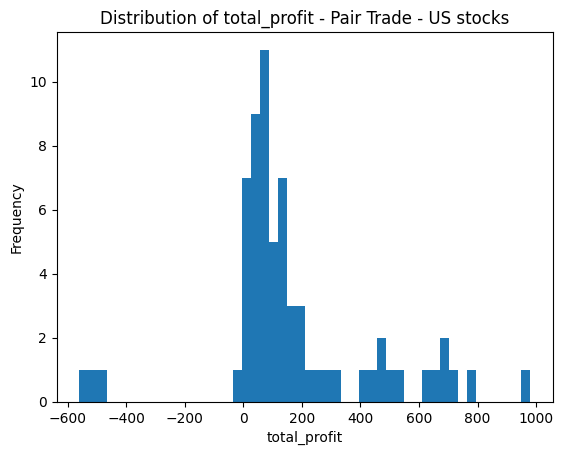

In [68]:
## Visualize the results of the most profitable quantile of pairs
plot_histogram( data = df_result_bt_pairtradeA_US["total_profit"],
                title = "Distribution of total_profit - Pair Trade - US stocks",
                xlabel = "total_profit",
                ylabel = "Frequency"
)

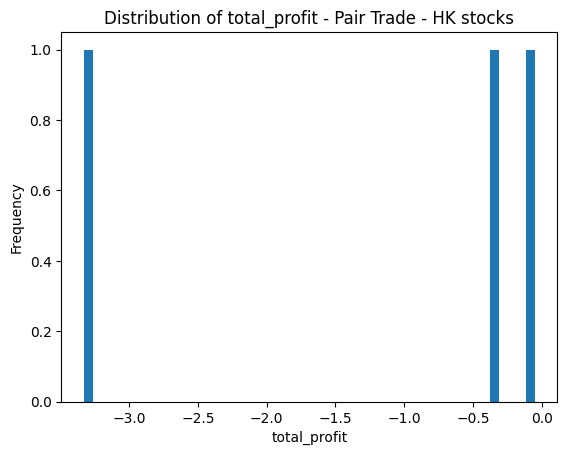

In [69]:
## Visualize the results of the most profitable quantile of pairs
plot_histogram( data = df_result_bt_pairtradeA_HK["total_profit"],
                title = "Distribution of total_profit - Pair Trade - HK stocks",
                xlabel = "total_profit",
                ylabel = "Frequency"
)

In [70]:
# Step 5: List the top n pairs that are most profitable
print("The top " + str(TOP_nStock) + " most profitable pairs are:")
top_pair_rtns_A_US = df_result_bt_pairtradeA_US.head(TOP_nStock)
display(top_pair_rtns_A_US)
top_pair_rtns_A_US.to_csv("top_pairs_A"+ suffix_US +".csv")

stock_pairs_A_US = top_pair_rtns_A_US['Pair'].to_list()

lt_tickers_pair_unique_A_US =  get_lt_tickers_pair_unique(stock_pairs_A_US)
print(lt_tickers_pair_unique_A_US)

The top 5 most profitable pairs are:


Pair StockA StockB  cointegration  correlation  total_profit  \
25  (BKNG, INTU)   BKNG   INTU       0.000323     0.969863    980.309570   
55  (MPWR, UBER)   MPWR   UBER       0.021416     0.906752    793.859684   
50  (LRCX, UBER)   LRCX   UBER       0.000881     0.980767    709.960012   
22  (AVGO, UBER)   AVGO   UBER       0.013989     0.978011    692.970156   
24    (BKNG, BX)   BKNG     BX       0.009110     0.939122    685.969353   

    total_trades  win_rate  profit_factor  riskreward_ratio  sharpe_ratio  \
25            90  0.644444       1.554098          0.857433      0.162518   
55            90  0.644444       3.927319          2.166797      0.480181   
50            80  0.612500       3.064437          1.938726      0.355064   
22            68  0.661765       2.746001          1.403511      0.293704   
24            78  0.628205       1.452292          0.859520      0.128868   

    maximum_drawdown  
25        530.970276  
55         98.189980  
50        152.289999  
22        163.429943  
24        420.579849

['UBER', 'BKNG', 'BX', 'LRCX', 'INTU', 'AVGO', 'MPWR']


In [71]:
# Step 5: List the top n pairs that are most profitable
print("The top " + str(TOP_nStock) + " most profitable pairs are:")
top_pair_rtns_A_HK = df_result_bt_pairtradeA_HK.head(TOP_nStock)
display(top_pair_rtns_A_HK)
top_pair_rtns_A_HK.to_csv("top_pairs_A"+ suffix_HK +".csv")

stock_pairs_A_HK = top_pair_rtns_A_HK['Pair'].to_list()

lt_tickers_pair_unique_A_HK =  get_lt_tickers_pair_unique(stock_pairs_A_HK)
print(lt_tickers_pair_unique_A_HK)

The top 5 most profitable pairs are:


Pair   StockA   StockB  cointegration  correlation  \
2  (0799.HK, 2333.HK)  0799.HK  2333.HK       0.043488    -0.270085   
1  (0799.HK, 1896.HK)  0799.HK  1896.HK       0.019374    -0.382885   
0  (0799.HK, 1810.HK)  0799.HK  1810.HK       0.033030    -0.374053   

   total_profit  total_trades  win_rate  profit_factor  riskreward_ratio  \
2     -0.050000            30  0.466667       0.994395          1.136451   
1     -0.320001            34  0.470588       0.967839          1.088819   
0     -3.329998            24  0.416667       0.632451          0.885431   

   sharpe_ratio  maximum_drawdown  
2     -0.001945          3.370000  
1     -0.010671          4.950001  
0     -0.164137          5.010000

['1896.HK', '1810.HK', '0799.HK', '2333.HK']


BackTesting B

In [72]:
check_cointgration_pair(df_close_US, pairs_US, COINT_PVALUE )

('AMAT', 'AMZN') are cointegrated, with pvalue =  0.03456235660960291
('AMAT', 'ETN') are cointegrated, with pvalue =  0.0009783755112099384
('AMAT', 'META') are cointegrated, with pvalue =  0.009549865803194536
('AMAT', 'NFLX') are cointegrated, with pvalue =  0.0030419453135324143
('AMAT', 'NVDA') are cointegrated, with pvalue =  0.00024750514041039395
('AMAT', 'PH') are cointegrated, with pvalue =  0.003661224885515231
('AMAT', 'SMCI') are cointegrated, with pvalue =  0.021107522692617394
('AMAT', 'UBER') are cointegrated, with pvalue =  0.02646040273314898
('AMD', 'CRM') are cointegrated, with pvalue =  0.0017601203232476977
('AMD', 'LEN') are cointegrated, with pvalue =  0.03237894265514332
('AMD', 'UBER') are cointegrated, with pvalue =  0.0172872405197374
('AMZN', 'AVGO') are cointegrated, with pvalue =  0.0028145865601842067
('AMZN', 'LRCX') are cointegrated, with pvalue =  0.0018597002068344445
('AMZN', 'RCL') are cointegrated, with pvalue =  0.01691067456983146
('ANET', 'BKNG

In [73]:
check_cointgration_pair(df_close_HK, pairs_HK, COINT_PVALUE )


('0799.HK', '1810.HK') are cointegrated, with pvalue =  0.03302964547980143
('0799.HK', '1896.HK') are cointegrated, with pvalue =  0.01937382061887412
('0799.HK', '2333.HK') are cointegrated, with pvalue =  0.043488354574127204


In [74]:
df_result_bt_pairtradeB_US = backtest_pairtradeB(df_close_US, pairs_US)
display(df_result_bt_pairtradeB_US)
df_result_bt_pairtradeB_US.to_csv("df_result_bt_pairtradeB_US")

Pair StockA StockB  cumulative_returns
6   (AMAT, SMCI)   AMAT   SMCI            2.654288
54  (MPWR, SMCI)   MPWR   SMCI            2.004538
47  (LRCX, NFLX)   LRCX   NFLX            1.746908
15  (ANET, CDNS)   ANET   CDNS            1.419835
26    (BX, INTU)     BX   INTU            1.408451
..           ...    ...    ...                 ...
20  (AVGO, NFLX)   AVGO   NFLX            0.891945
40   (DHI, NFLX)    DHI   NFLX            0.883193
17  (ANET, UBER)   ANET   UBER            0.880126
21    (AVGO, PH)   AVGO     PH            0.802628
62  (NXPI, SMCI)   NXPI   SMCI            0.667678

[66 rows x 4 columns]

In [75]:
df_result_bt_pairtradeB_HK = backtest_pairtradeB(df_close_HK, pairs_HK)
display(df_result_bt_pairtradeB_HK)
df_result_bt_pairtradeB_HK.to_csv("df_result_bt_pairtradeB_HK")

Pair   StockA   StockB  cumulative_returns
1  (0799.HK, 1896.HK)  0799.HK  1896.HK            0.889695
0  (0799.HK, 1810.HK)  0799.HK  1810.HK            0.831896
2  (0799.HK, 2333.HK)  0799.HK  2333.HK            0.635389

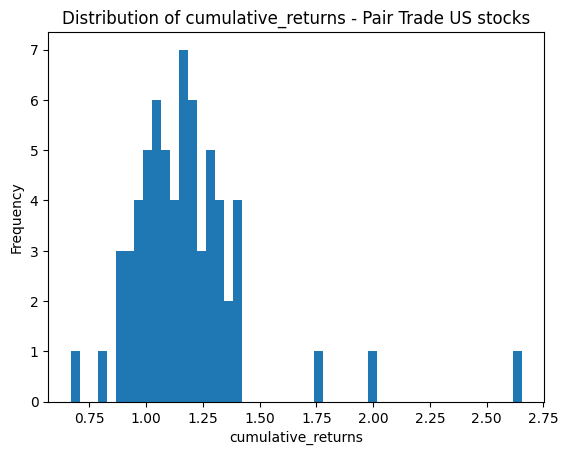

In [76]:
## Visualize the results of the most profitable quantile of pairs
plot_histogram( data = df_result_bt_pairtradeB_US["cumulative_returns"],
                title = "Distribution of cumulative_returns - Pair Trade US stocks",
                xlabel = "cumulative_returns",
                ylabel = "Frequency"
)

In [77]:
df_result_bt_pairtradeB_HK

Pair   StockA   StockB  cumulative_returns
1  (0799.HK, 1896.HK)  0799.HK  1896.HK            0.889695
0  (0799.HK, 1810.HK)  0799.HK  1810.HK            0.831896
2  (0799.HK, 2333.HK)  0799.HK  2333.HK            0.635389

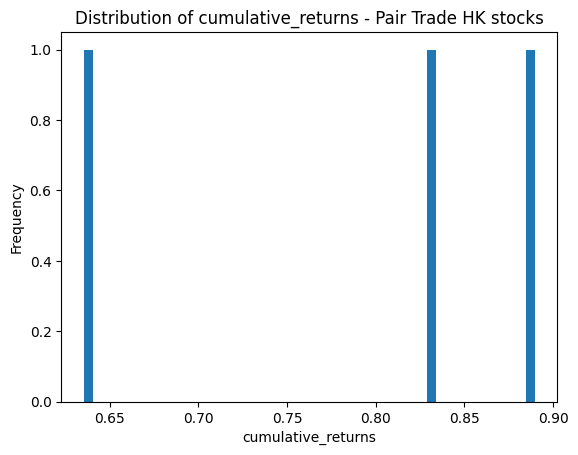

In [78]:
## Visualize the results of the most profitable quantile of pairs
plot_histogram( data = df_result_bt_pairtradeB_HK["cumulative_returns"],
                title = "Distribution of cumulative_returns - Pair Trade HK stocks",
                xlabel = "cumulative_returns",
                ylabel = "Frequency"
)

In [79]:
# Step 5: List the n pairs that are most profitable
print("The top " + str(TOP_nStock) + " most profitable pairs are:")
top_pair_rtns_B_US = df_result_bt_pairtradeB_US.head(TOP_nStock)
display(top_pair_rtns_B_US)
top_pair_rtns_B_US.to_csv("top_pairs_B"+ suffix_US +".csv")

stock_pairs_B_US = top_pair_rtns_B_US['Pair'].to_list()

lt_tickers_pair_unique_B_US =  get_lt_tickers_pair_unique(stock_pairs_B_US)
print(lt_tickers_pair_unique_B_US)

The top 5 most profitable pairs are:


Pair StockA StockB  cumulative_returns
6   (AMAT, SMCI)   AMAT   SMCI            2.654288
54  (MPWR, SMCI)   MPWR   SMCI            2.004538
47  (LRCX, NFLX)   LRCX   NFLX            1.746908
15  (ANET, CDNS)   ANET   CDNS            1.419835
26    (BX, INTU)     BX   INTU            1.408451

['INTU', 'CDNS', 'BX', 'ANET', 'LRCX', 'SMCI', 'NFLX', 'AMAT', 'MPWR']


In [80]:
# Step 5: List the n pairs that are most profitable
print("The top " + str(TOP_nStock) + " most profitable pairs are:")
top_pair_rtns_B_HK = df_result_bt_pairtradeB_HK.head(TOP_nStock)
display(top_pair_rtns_B_HK)
top_pair_rtns_B_HK.to_csv("top_pairs_B"+ suffix_HK +".csv")

stock_pairs_B_HK = top_pair_rtns_B_HK['Pair'].to_list()

lt_tickers_pair_unique_B_HK =  get_lt_tickers_pair_unique(stock_pairs_B_HK)
print(lt_tickers_pair_unique_B_HK)

The top 5 most profitable pairs are:


Pair   StockA   StockB  cumulative_returns
1  (0799.HK, 1896.HK)  0799.HK  1896.HK            0.889695
0  (0799.HK, 1810.HK)  0799.HK  1810.HK            0.831896
2  (0799.HK, 2333.HK)  0799.HK  2333.HK            0.635389

['1896.HK', '1810.HK', '0799.HK', '2333.HK']


QQ plot and distribution plot

[*********************100%%**********************]  1 of 1 completed


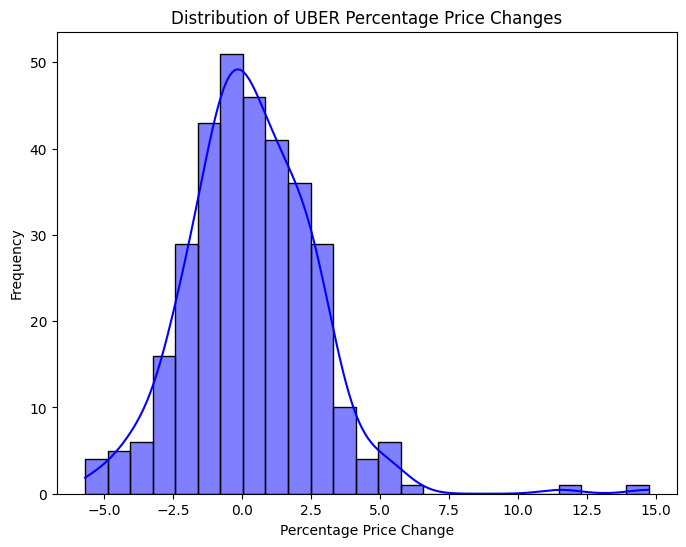

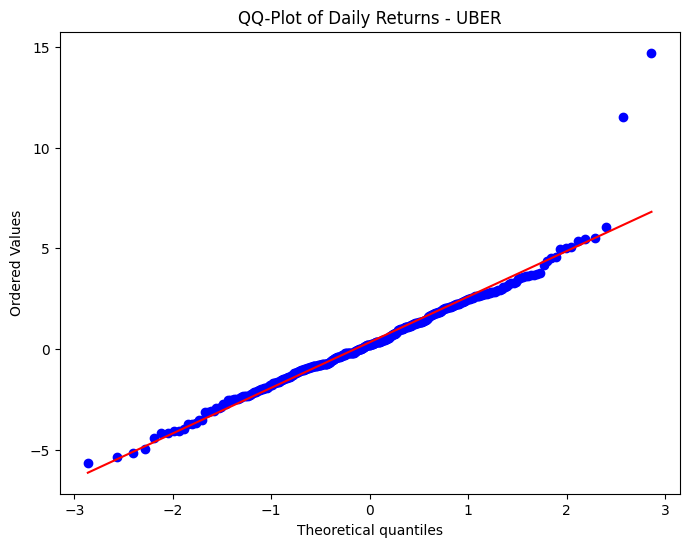

[*********************100%%**********************]  1 of 1 completed


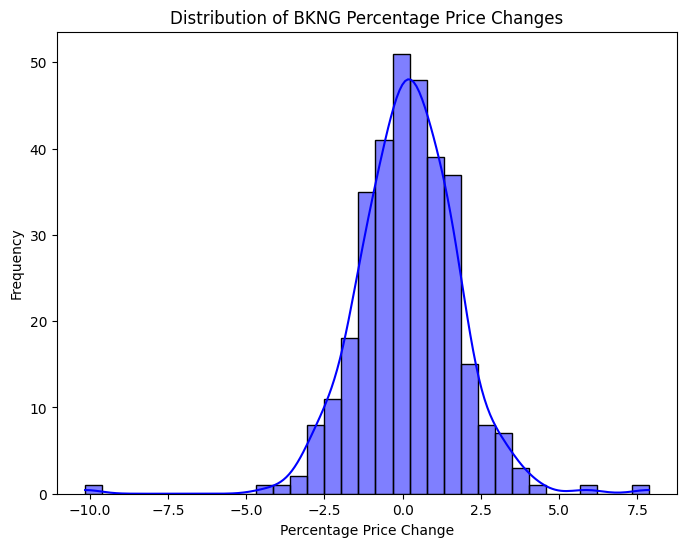

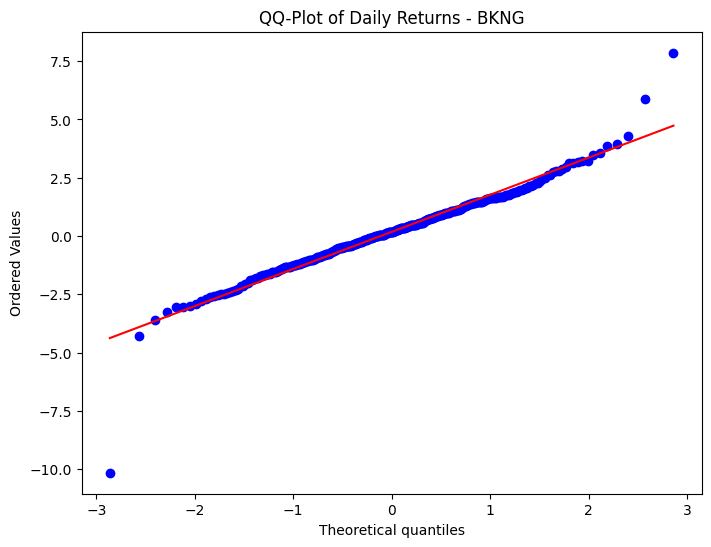

[*********************100%%**********************]  1 of 1 completed


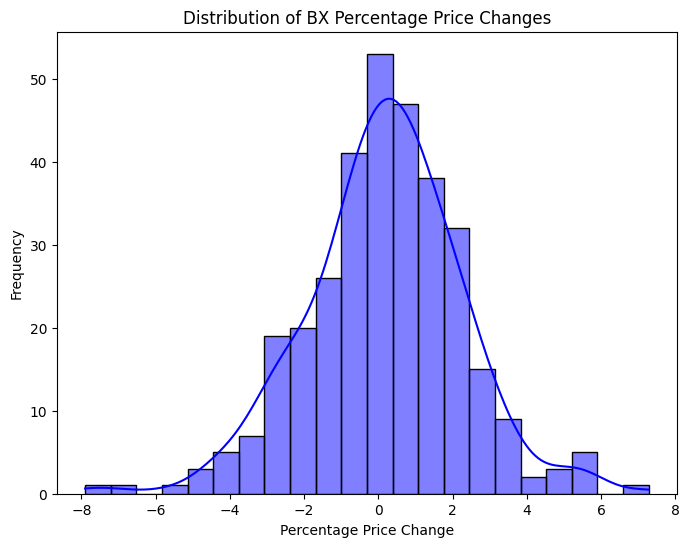

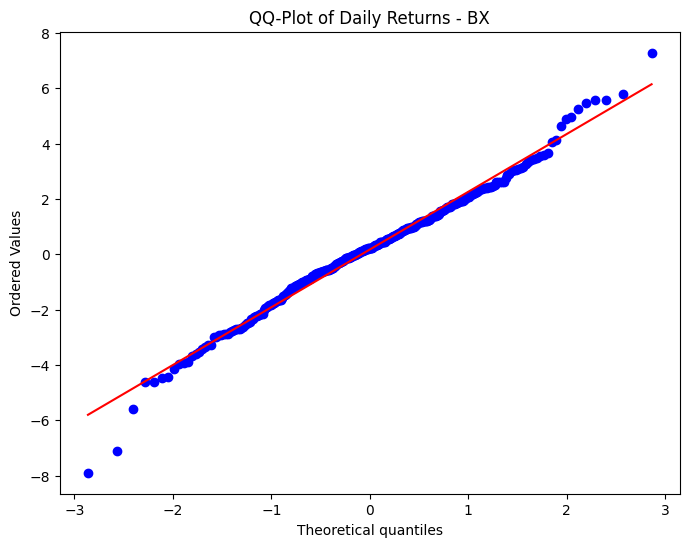

[*********************100%%**********************]  1 of 1 completed


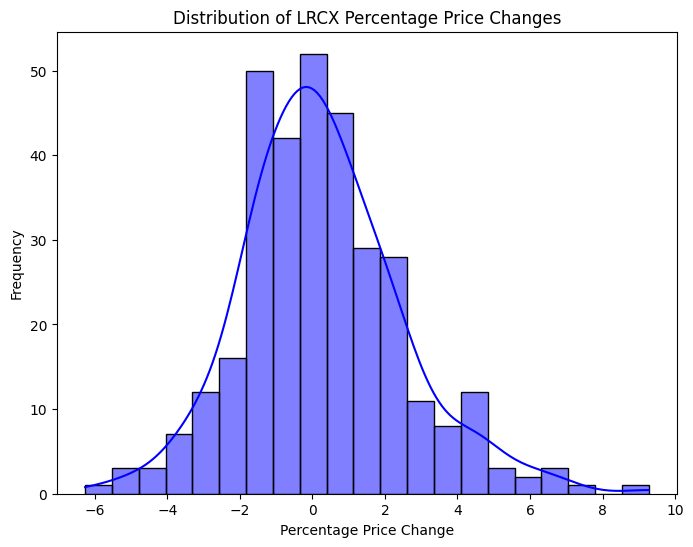

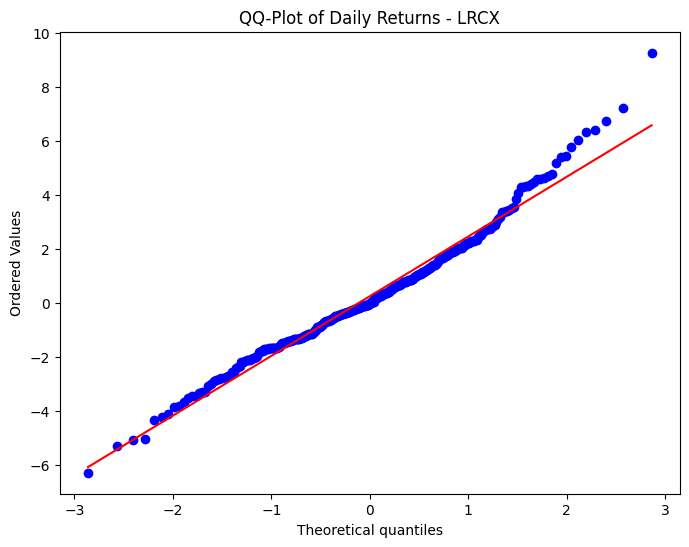

[*********************100%%**********************]  1 of 1 completed


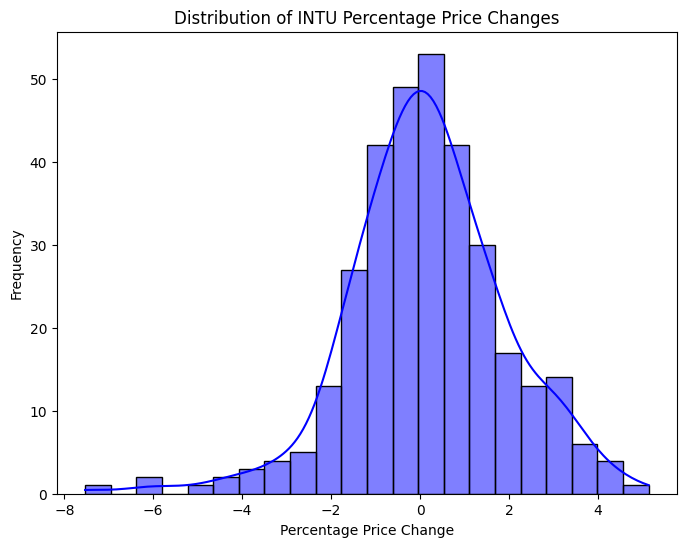

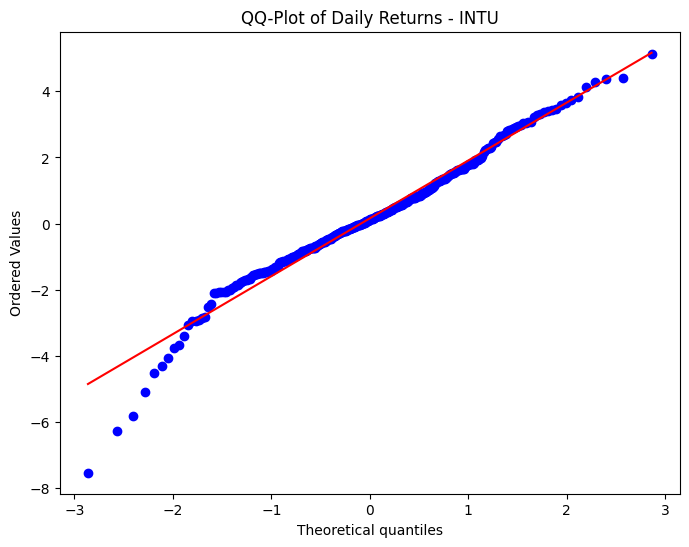

[*********************100%%**********************]  1 of 1 completed


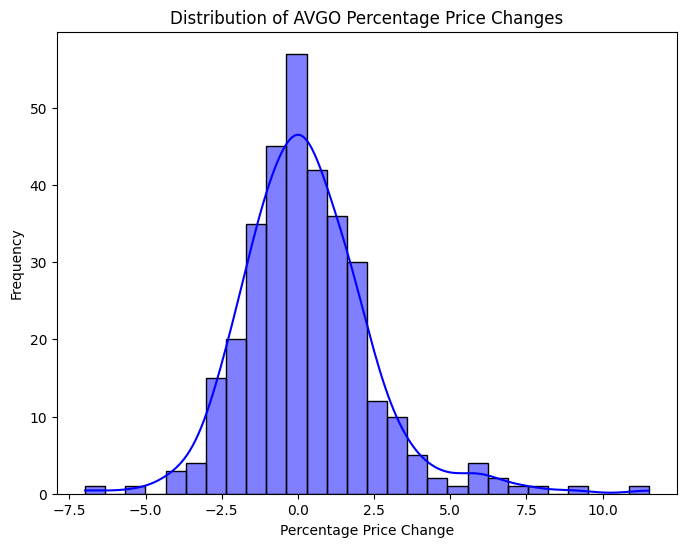

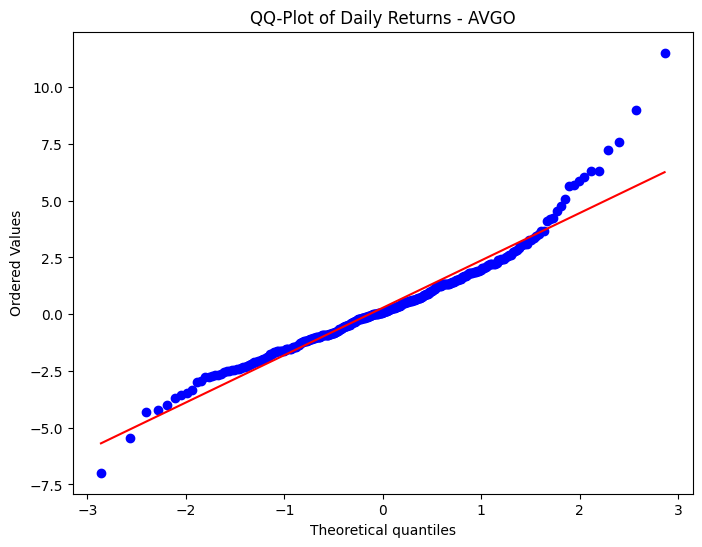

[*********************100%%**********************]  1 of 1 completed


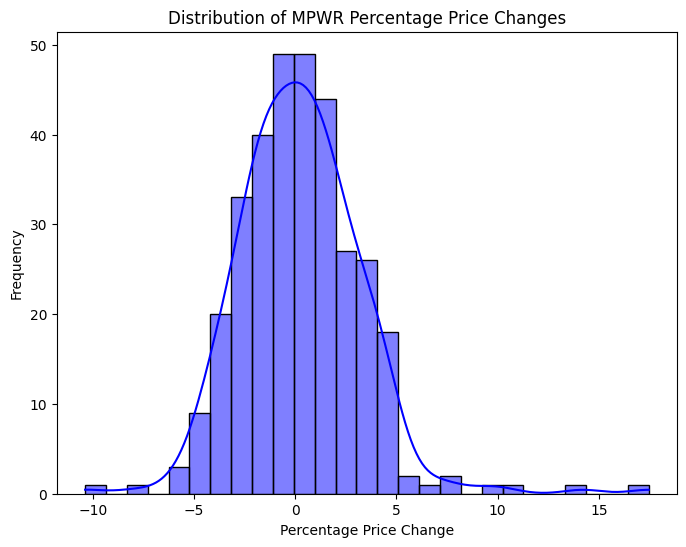

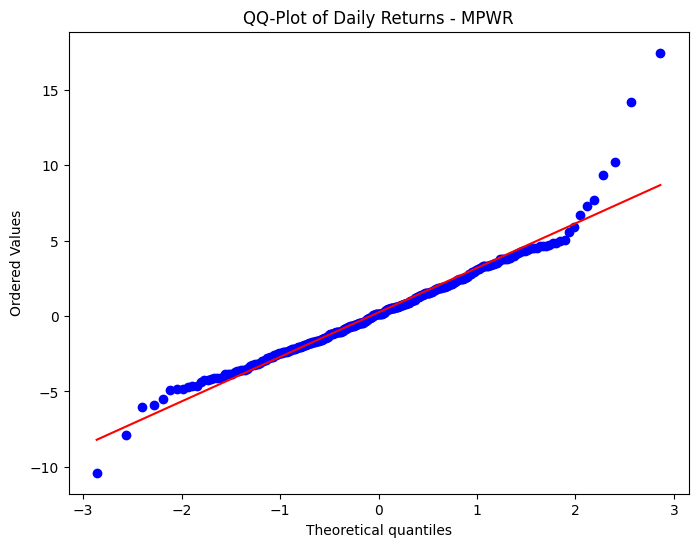

In [81]:
import yfinance as yf
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the list of stock symbols
symbols = lt_tickers_pair_unique_A_US

# Create a dictionary to store the simulated patterns for each stock
simulated_patterns_dict = {}

# Loop through each ticker symbol in the list
for ticker in symbols:
    # Download historical data for each stock
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

    # Ensure that there is data in the DataFrame
    if not stock_data.empty:
        # Extract the closing prices
        prices = stock_data["Close"].dropna().values

        # Check if we have at least 2 prices to calculate returns
        if len(prices) > 1:
            # Calculate daily returns as percentage price changes
            returns = np.diff(prices) / prices[:-1] * 100

            # Plotting the histogram of percentage price changes
            plt.figure(figsize=(8, 6))
            sns.histplot(returns, kde=True, color="blue")
            plt.title(f"Distribution of {ticker} Percentage Price Changes")
            plt.xlabel("Percentage Price Change")
            plt.ylabel("Frequency")
            plt.show()  # Uncomment to show the plot

            # QQ-plot of the daily returns against a normal distribution
            plt.figure(figsize=(8, 6))
            stats.probplot(returns, dist="norm", plot=plt)
            plt.title(f"QQ-Plot of Daily Returns - {ticker}")
            plt.show()  # Uncomment to show the plot

    else:
        print(f"No data for ticker: {ticker}")

# Shortlisted stocks

In [82]:
# List the TOP_nStock pairs that are most profitable
print("Shortlist A - US")

print("The stocks pairs shortlised for backtesting: ")
display(top_pair_rtns_A_US)
pprint(stock_pairs_A_US)
print("")
print("The stocks shortlised for backtesting: ")
print(lt_tickers_pair_unique_A_US)
display((df_stockinfo_US).loc[lt_tickers_pair_unique_A_US , ["shortName"]])

Shortlist A - US
The stocks pairs shortlised for backtesting: 


Pair StockA StockB  cointegration  correlation  total_profit  \
25  (BKNG, INTU)   BKNG   INTU       0.000323     0.969863    980.309570   
55  (MPWR, UBER)   MPWR   UBER       0.021416     0.906752    793.859684   
50  (LRCX, UBER)   LRCX   UBER       0.000881     0.980767    709.960012   
22  (AVGO, UBER)   AVGO   UBER       0.013989     0.978011    692.970156   
24    (BKNG, BX)   BKNG     BX       0.009110     0.939122    685.969353   

    total_trades  win_rate  profit_factor  riskreward_ratio  sharpe_ratio  \
25            90  0.644444       1.554098          0.857433      0.162518   
55            90  0.644444       3.927319          2.166797      0.480181   
50            80  0.612500       3.064437          1.938726      0.355064   
22            68  0.661765       2.746001          1.403511      0.293704   
24            78  0.628205       1.452292          0.859520      0.128868   

    maximum_drawdown  
25        530.970276  
55         98.189980  
50        152.289999  
22        163.429943  
24        420.579849

[('BKNG', 'INTU'),
 ('MPWR', 'UBER'),
 ('LRCX', 'UBER'),
 ('AVGO', 'UBER'),
 ('BKNG', 'BX')]

The stocks shortlised for backtesting: 
['UBER', 'BKNG', 'BX', 'LRCX', 'INTU', 'AVGO', 'MPWR']


shortName
symbol                                 
UBER            Uber Technologies, Inc.
BKNG    Booking Holdings Inc. Common St
BX                      Blackstone Inc.
LRCX           Lam Research Corporation
INTU                        Intuit Inc.
AVGO                      Broadcom Inc.
MPWR     Monolithic Power Systems, Inc.

In [83]:
# List the TOP_nStock pairs that are most profitable
print("Shortlist B - US")

print("The stocks pairs shortlised for backtesting: ")
display(top_pair_rtns_B_US)
pprint(stock_pairs_B_US)
print("")
print("The stocks shortlised for backtesting: ")
print(lt_tickers_pair_unique_B_US)
display((df_stockinfo_US).loc[lt_tickers_pair_unique_B_US , ["shortName"]])

Shortlist B - US
The stocks pairs shortlised for backtesting: 


Pair StockA StockB  cumulative_returns
6   (AMAT, SMCI)   AMAT   SMCI            2.654288
54  (MPWR, SMCI)   MPWR   SMCI            2.004538
47  (LRCX, NFLX)   LRCX   NFLX            1.746908
15  (ANET, CDNS)   ANET   CDNS            1.419835
26    (BX, INTU)     BX   INTU            1.408451

[('AMAT', 'SMCI'),
 ('MPWR', 'SMCI'),
 ('LRCX', 'NFLX'),
 ('ANET', 'CDNS'),
 ('BX', 'INTU')]

The stocks shortlised for backtesting: 
['INTU', 'CDNS', 'BX', 'ANET', 'LRCX', 'SMCI', 'NFLX', 'AMAT', 'MPWR']


shortName
symbol                                
INTU                       Intuit Inc.
CDNS      Cadence Design Systems, Inc.
BX                     Blackstone Inc.
ANET             Arista Networks, Inc.
LRCX          Lam Research Corporation
SMCI        Super Micro Computer, Inc.
NFLX                     Netflix, Inc.
AMAT           Applied Materials, Inc.
MPWR    Monolithic Power Systems, Inc.

In [84]:
# List the TOP_nStock pairs that are most profitable
print("Shortlist A - HK")

print("The stocks pairs shortlised for backtesting: ")
display(top_pair_rtns_A_HK)
pprint(stock_pairs_A_HK)
print("")
print("The stocks shortlised for backtesting: ")
print(lt_tickers_pair_unique_A_HK)
display((df_stockinfo_HK).loc[lt_tickers_pair_unique_A_HK , ["shortName"]])

Shortlist A - HK
The stocks pairs shortlised for backtesting: 


Pair   StockA   StockB  cointegration  correlation  \
2  (0799.HK, 2333.HK)  0799.HK  2333.HK       0.043488    -0.270085   
1  (0799.HK, 1896.HK)  0799.HK  1896.HK       0.019374    -0.382885   
0  (0799.HK, 1810.HK)  0799.HK  1810.HK       0.033030    -0.374053   

   total_profit  total_trades  win_rate  profit_factor  riskreward_ratio  \
2     -0.050000            30  0.466667       0.994395          1.136451   
1     -0.320001            34  0.470588       0.967839          1.088819   
0     -3.329998            24  0.416667       0.632451          0.885431   

   sharpe_ratio  maximum_drawdown  
2     -0.001945          3.370000  
1     -0.010671          4.950001  
0     -0.164137          5.010000

[('0799.HK', '2333.HK'), ('0799.HK', '1896.HK'), ('0799.HK', '1810.HK')]

The stocks shortlised for backtesting: 
['1896.HK', '1810.HK', '0799.HK', '2333.HK']


shortName
symbol             
1896.HK  MAOYAN ENT
1810.HK    XIAOMI-W
0799.HK         IGG
2333.HK     GWMOTOR

In [85]:
# List the TOP_nStock pairs that are most profitable
print("Shortlist B - HK")

print("The stocks pairs shortlised for backtesting: ")
display(top_pair_rtns_B_HK)
pprint(stock_pairs_B_HK)
print("")
print("The stocks shortlised for backtesting: ")
print(lt_tickers_pair_unique_B_HK)
display((df_stockinfo_HK).loc[lt_tickers_pair_unique_B_HK , ["shortName"]])

Shortlist B - HK
The stocks pairs shortlised for backtesting: 


Pair   StockA   StockB  cumulative_returns
1  (0799.HK, 1896.HK)  0799.HK  1896.HK            0.889695
0  (0799.HK, 1810.HK)  0799.HK  1810.HK            0.831896
2  (0799.HK, 2333.HK)  0799.HK  2333.HK            0.635389

[('0799.HK', '1896.HK'), ('0799.HK', '1810.HK'), ('0799.HK', '2333.HK')]

The stocks shortlised for backtesting: 
['1896.HK', '1810.HK', '0799.HK', '2333.HK']


shortName
symbol             
1896.HK  MAOYAN ENT
1810.HK    XIAOMI-W
0799.HK         IGG
2333.HK     GWMOTOR

In [86]:
# print("\nTop pairs result - C - US")
# display(top_pair_rtns_C_US)
print("\nTop pairs result - A - US")
display(top_pair_rtns_A_US)

print("\nTop pairs result - B - US")
display(top_pair_rtns_B_US)



Top pairs result - A - US


Pair StockA StockB  cointegration  correlation  total_profit  \
25  (BKNG, INTU)   BKNG   INTU       0.000323     0.969863    980.309570   
55  (MPWR, UBER)   MPWR   UBER       0.021416     0.906752    793.859684   
50  (LRCX, UBER)   LRCX   UBER       0.000881     0.980767    709.960012   
22  (AVGO, UBER)   AVGO   UBER       0.013989     0.978011    692.970156   
24    (BKNG, BX)   BKNG     BX       0.009110     0.939122    685.969353   

    total_trades  win_rate  profit_factor  riskreward_ratio  sharpe_ratio  \
25            90  0.644444       1.554098          0.857433      0.162518   
55            90  0.644444       3.927319          2.166797      0.480181   
50            80  0.612500       3.064437          1.938726      0.355064   
22            68  0.661765       2.746001          1.403511      0.293704   
24            78  0.628205       1.452292          0.859520      0.128868   

    maximum_drawdown  
25        530.970276  
55         98.189980  
50        152.289999  
22        163.429943  
24        420.579849


Top pairs result - B - US


Pair StockA StockB  cumulative_returns
6   (AMAT, SMCI)   AMAT   SMCI            2.654288
54  (MPWR, SMCI)   MPWR   SMCI            2.004538
47  (LRCX, NFLX)   LRCX   NFLX            1.746908
15  (ANET, CDNS)   ANET   CDNS            1.419835
26    (BX, INTU)     BX   INTU            1.408451

In [87]:
print("\nstock_pairs_A_US")
df_pairs_sector_industry_A_US = get_df_pair_sector_industry( stock_pairs_A_US, df_stock_sector_US)
display(df_pairs_sector_industry_A_US)

print("\nstock_pairs_B_US")
df_pairs_sector_industry_B_US = get_df_pair_sector_industry( stock_pairs_B_US, df_stock_sector_US)
display(df_pairs_sector_industry_B_US)


stock_pairs_A_US


Pair StockA StockB                       shortNameA  \
0  (BKNG, INTU)   BKNG   INTU  Booking Holdings Inc. Common St   
1  (MPWR, UBER)   MPWR   UBER   Monolithic Power Systems, Inc.   
2  (LRCX, UBER)   LRCX   UBER         Lam Research Corporation   
3  (AVGO, UBER)   AVGO   UBER                    Broadcom Inc.   
4    (BKNG, BX)   BKNG     BX  Booking Holdings Inc. Common St   

                shortNameB            sectorA             sectorB  \
0              Intuit Inc.  Consumer Cyclical          Technology   
1  Uber Technologies, Inc.         Technology          Technology   
2  Uber Technologies, Inc.         Technology          Technology   
3  Uber Technologies, Inc.         Technology          Technology   
4          Blackstone Inc.  Consumer Cyclical  Financial Services   

                             industryA               industryB  same_sector  \
0                      Travel Services  Software - Application        False   
1                       Semiconductors  Software - Application         True   
2  Semiconductor Equipment & Materials  Software - Application         True   
3                       Semiconductors  Software - Application         True   
4                      Travel Services        Asset Management        False   

   same_industry  
0          False  
1          False  
2          False  
3          False  
4          False


stock_pairs_B_US


Pair StockA StockB                      shortNameA  \
0  (AMAT, SMCI)   AMAT   SMCI         Applied Materials, Inc.   
1  (MPWR, SMCI)   MPWR   SMCI  Monolithic Power Systems, Inc.   
2  (LRCX, NFLX)   LRCX   NFLX        Lam Research Corporation   
3  (ANET, CDNS)   ANET   CDNS           Arista Networks, Inc.   
4    (BX, INTU)     BX   INTU                 Blackstone Inc.   

                     shortNameB             sectorA                 sectorB  \
0    Super Micro Computer, Inc.          Technology              Technology   
1    Super Micro Computer, Inc.          Technology              Technology   
2                 Netflix, Inc.          Technology  Communication Services   
3  Cadence Design Systems, Inc.          Technology              Technology   
4                   Intuit Inc.  Financial Services              Technology   

                             industryA               industryB  same_sector  \
0  Semiconductor Equipment & Materials       Computer Hardware         True   
1                       Semiconductors       Computer Hardware         True   
2  Semiconductor Equipment & Materials           Entertainment        False   
3                    Computer Hardware  Software - Application         True   
4                     Asset Management  Software - Application        False   

   same_industry  
0          False  
1          False  
2          False  
3          False  
4          False

In [88]:
print("\nstock_pairs_A_US")
display(stock_pairs_A_US)

print("\nstock_pairs_B_US")
display(stock_pairs_B_US)


stock_pairs_A_US


[('BKNG', 'INTU'),
 ('MPWR', 'UBER'),
 ('LRCX', 'UBER'),
 ('AVGO', 'UBER'),
 ('BKNG', 'BX')]


stock_pairs_B_US


[('AMAT', 'SMCI'),
 ('MPWR', 'SMCI'),
 ('LRCX', 'NFLX'),
 ('ANET', 'CDNS'),
 ('BX', 'INTU')]

In [89]:

print("\nTop pairs result - A - HK")
display(top_pair_rtns_A_HK)


print("\nTop pairs result - B - HK")
display(top_pair_rtns_B_HK)



Top pairs result - A - HK


Pair   StockA   StockB  cointegration  correlation  \
2  (0799.HK, 2333.HK)  0799.HK  2333.HK       0.043488    -0.270085   
1  (0799.HK, 1896.HK)  0799.HK  1896.HK       0.019374    -0.382885   
0  (0799.HK, 1810.HK)  0799.HK  1810.HK       0.033030    -0.374053   

   total_profit  total_trades  win_rate  profit_factor  riskreward_ratio  \
2     -0.050000            30  0.466667       0.994395          1.136451   
1     -0.320001            34  0.470588       0.967839          1.088819   
0     -3.329998            24  0.416667       0.632451          0.885431   

   sharpe_ratio  maximum_drawdown  
2     -0.001945          3.370000  
1     -0.010671          4.950001  
0     -0.164137          5.010000


Top pairs result - B - HK


Pair   StockA   StockB  cumulative_returns
1  (0799.HK, 1896.HK)  0799.HK  1896.HK            0.889695
0  (0799.HK, 1810.HK)  0799.HK  1810.HK            0.831896
2  (0799.HK, 2333.HK)  0799.HK  2333.HK            0.635389

In [90]:
print("\nstock_pairs_A_HK")
df_pairs_sector_industry_A_HK = get_df_pair_sector_industry( stock_pairs_A_HK, df_stock_sector_HK)
display(df_pairs_sector_industry_A_HK)

print("\nstock_pairs_B_HK")
df_pairs_sector_industry_B_HK = get_df_pair_sector_industry( stock_pairs_B_HK, df_stock_sector_HK)
display(df_pairs_sector_industry_B_HK)



stock_pairs_A_HK


Pair   StockA   StockB shortNameA  shortNameB  \
0  (0799.HK, 2333.HK)  0799.HK  2333.HK        IGG     GWMOTOR   
1  (0799.HK, 1896.HK)  0799.HK  1896.HK        IGG  MAOYAN ENT   
2  (0799.HK, 1810.HK)  0799.HK  1810.HK        IGG    XIAOMI-W   

                  sectorA                 sectorB  \
0  Communication Services       Consumer Cyclical   
1  Communication Services  Communication Services   
2  Communication Services              Technology   

                        industryA                       industryB  \
0  Electronic Gaming & Multimedia              Auto Manufacturers   
1  Electronic Gaming & Multimedia  Internet Content & Information   
2  Electronic Gaming & Multimedia            Consumer Electronics   

   same_sector  same_industry  
0        False          False  
1         True          False  
2        False          False


stock_pairs_B_HK


Pair   StockA   StockB shortNameA  shortNameB  \
0  (0799.HK, 1896.HK)  0799.HK  1896.HK        IGG  MAOYAN ENT   
1  (0799.HK, 1810.HK)  0799.HK  1810.HK        IGG    XIAOMI-W   
2  (0799.HK, 2333.HK)  0799.HK  2333.HK        IGG     GWMOTOR   

                  sectorA                 sectorB  \
0  Communication Services  Communication Services   
1  Communication Services              Technology   
2  Communication Services       Consumer Cyclical   

                        industryA                       industryB  \
0  Electronic Gaming & Multimedia  Internet Content & Information   
1  Electronic Gaming & Multimedia            Consumer Electronics   
2  Electronic Gaming & Multimedia              Auto Manufacturers   

   same_sector  same_industry  
0         True          False  
1        False          False  
2        False          False

In [91]:
print("\nstock_pairs_A_HK")
display(stock_pairs_A_HK)

print("\nstock_pairs_B_HK")
display(stock_pairs_B_HK)



stock_pairs_A_HK


[('0799.HK', '2333.HK'), ('0799.HK', '1896.HK'), ('0799.HK', '1810.HK')]


stock_pairs_B_HK


[('0799.HK', '1896.HK'), ('0799.HK', '1810.HK'), ('0799.HK', '2333.HK')]

# Visualize the historical movement of the shortlisted stocks

In [92]:
#### Stock Data
df_stocks_data_raw_A_US = get_stockdata( lt_tickers_pair_unique_A_US , start_date, end_date)
display(df_stocks_data_raw_A_US )

display(top_pair_rtns_A_US)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Symbol        Open        High         Low       Close   Adj Close  \
Date                                                                            
2023-01-03   UBER   25.370001   25.750000   25.020000   25.360001   25.360001   
2023-01-04   UBER   25.730000   25.969999   25.320000   25.910000   25.910000   
2023-01-05   UBER   25.730000   26.010000   25.549999   25.549999   25.549999   
2023-01-06   UBER   25.860001   26.540001   25.400000   26.400000   26.400000   
2023-01-09   UBER   27.299999   28.049999   27.150000   27.400000   27.400000   
...           ...         ...         ...         ...         ...         ...   
2024-04-19   MPWR  619.159973  619.159973  587.530029  591.520020  591.520020   
2024-04-22   MPWR  596.770020  603.270020  584.950012  600.630005  600.630005   
2024-04-23   MPWR  603.640015  617.809998  601.340027  611.369995  611.369995   
2024-04-24   MPWR  636.510010  655.229980  628.260010  642.210022  642.210022   
2024-04-25   MPWR  638.330017  667.059998  636.400024  660.340027  660.340027   

              Volume  
Date                  
2023-01-03  22155300  
2023-01-04  14816000  
2023-01-05   9942000  
2023-01-06  19443800  
2023-01-09  24962100  
...              ...  
2024-04-19    723600  
2024-04-22    467800  
2024-04-23    508600  
2024-04-24    768900  
2024-04-25    435500  

[2310 rows x 7 columns]

Pair StockA StockB  cointegration  correlation  total_profit  \
25  (BKNG, INTU)   BKNG   INTU       0.000323     0.969863    980.309570   
55  (MPWR, UBER)   MPWR   UBER       0.021416     0.906752    793.859684   
50  (LRCX, UBER)   LRCX   UBER       0.000881     0.980767    709.960012   
22  (AVGO, UBER)   AVGO   UBER       0.013989     0.978011    692.970156   
24    (BKNG, BX)   BKNG     BX       0.009110     0.939122    685.969353   

    total_trades  win_rate  profit_factor  riskreward_ratio  sharpe_ratio  \
25            90  0.644444       1.554098          0.857433      0.162518   
55            90  0.644444       3.927319          2.166797      0.480181   
50            80  0.612500       3.064437          1.938726      0.355064   
22            68  0.661765       2.746001          1.403511      0.293704   
24            78  0.628205       1.452292          0.859520      0.128868   

    maximum_drawdown  
25        530.970276  
55         98.189980  
50        152.289999  
22        163.429943  
24        420.579849

In [93]:
plot_history_pair(df_stocks_data_raw_A_US, stock_pairs_A_US)

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

In [94]:
df_stocks_data_raw_B_US = get_stockdata( lt_tickers_pair_unique_B_US , start_date, end_date)
display(df_stocks_data_raw_B_US )

display(top_pair_rtns_B_US)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Symbol        Open        High         Low       Close   Adj Close  \
Date                                                                            
2023-01-03   INTU  396.700012  404.450012  385.220001  391.179993  391.179993   
2023-01-04   INTU  397.579987  399.720001  387.600006  391.570007  391.570007   
2023-01-05   INTU  386.350006  387.470001  375.000000  375.619995  375.619995   
2023-01-06   INTU  380.239990  389.339996  370.619995  386.519989  386.519989   
2023-01-09   INTU  391.100006  402.640015  388.160004  395.339996  395.339996   
...           ...         ...         ...         ...         ...         ...   
2024-04-19   MPWR  619.159973  619.159973  587.530029  591.520020  591.520020   
2024-04-22   MPWR  596.770020  603.270020  584.950012  600.630005  600.630005   
2024-04-23   MPWR  603.640015  617.809998  601.340027  611.369995  611.369995   
2024-04-24   MPWR  636.510010  655.229980  628.260010  642.210022  642.210022   
2024-04-25   MPWR  638.330017  667.059998  636.400024  660.340027  660.340027   

             Volume  
Date                 
2023-01-03  1874000  
2023-01-04  1209700  
2023-01-05  1263800  
2023-01-06  1312700  
2023-01-09  1331600  
...             ...  
2024-04-19   723600  
2024-04-22   467800  
2024-04-23   508600  
2024-04-24   768900  
2024-04-25   435500  

[2970 rows x 7 columns]

Pair StockA StockB  cumulative_returns
6   (AMAT, SMCI)   AMAT   SMCI            2.654288
54  (MPWR, SMCI)   MPWR   SMCI            2.004538
47  (LRCX, NFLX)   LRCX   NFLX            1.746908
15  (ANET, CDNS)   ANET   CDNS            1.419835
26    (BX, INTU)     BX   INTU            1.408451

In [95]:
plot_history_pair(df_stocks_data_raw_B_US, stock_pairs_B_US)

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

In [96]:
df_stocks_data_raw_A_HK = get_stockdata( lt_tickers_pair_unique_A_HK , start_date, end_date)
display(df_stocks_data_raw_A_HK )

display(top_pair_rtns_A_HK)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Symbol   Open   High    Low  Close  Adj Close     Volume
Date                                                                 
2023-01-03  1896.HK   9.00   9.57   9.00   9.25       9.25    6590669
2023-01-04  1896.HK   9.45   9.62   9.10   9.40       9.40    4702200
2023-01-05  1896.HK   9.52   9.77   9.42   9.70       9.70    6118199
2023-01-06  1896.HK   9.73   9.90   9.40   9.45       9.45    4782800
2023-01-09  1896.HK   9.55  10.00   9.50   9.80       9.80    5080400
...             ...    ...    ...    ...    ...        ...        ...
2024-04-19  2333.HK  11.00  11.10  10.58  11.02      11.02   18164565
2024-04-22  2333.HK  11.04  11.06  10.14  10.34      10.34   39905079
2024-04-23  2333.HK  10.50  10.84  10.26  10.78      10.78   25617091
2024-04-24  2333.HK  10.98  11.26  10.86  11.22      11.22   26284308
2024-04-25  2333.HK  11.76  12.64  11.74  11.82      11.82  105016067

[1284 rows x 7 columns]

Pair   StockA   StockB  cointegration  correlation  \
2  (0799.HK, 2333.HK)  0799.HK  2333.HK       0.043488    -0.270085   
1  (0799.HK, 1896.HK)  0799.HK  1896.HK       0.019374    -0.382885   
0  (0799.HK, 1810.HK)  0799.HK  1810.HK       0.033030    -0.374053   

   total_profit  total_trades  win_rate  profit_factor  riskreward_ratio  \
2     -0.050000            30  0.466667       0.994395          1.136451   
1     -0.320001            34  0.470588       0.967839          1.088819   
0     -3.329998            24  0.416667       0.632451          0.885431   

   sharpe_ratio  maximum_drawdown  
2     -0.001945          3.370000  
1     -0.010671          4.950001  
0     -0.164137          5.010000

In [97]:
plot_history_pair(df_stocks_data_raw_A_HK, stock_pairs_A_HK)

None

None

None

None

None

None

None

None

None

In [98]:
df_stocks_data_raw_B_HK = get_stockdata( lt_tickers_pair_unique_B_HK , start_date, end_date)
display(df_stocks_data_raw_B_HK )

display(top_pair_rtns_B_HK)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Symbol   Open   High    Low  Close  Adj Close     Volume
Date                                                                 
2023-01-03  1896.HK   9.00   9.57   9.00   9.25       9.25    6590669
2023-01-04  1896.HK   9.45   9.62   9.10   9.40       9.40    4702200
2023-01-05  1896.HK   9.52   9.77   9.42   9.70       9.70    6118199
2023-01-06  1896.HK   9.73   9.90   9.40   9.45       9.45    4782800
2023-01-09  1896.HK   9.55  10.00   9.50   9.80       9.80    5080400
...             ...    ...    ...    ...    ...        ...        ...
2024-04-19  2333.HK  11.00  11.10  10.58  11.02      11.02   18164565
2024-04-22  2333.HK  11.04  11.06  10.14  10.34      10.34   39905079
2024-04-23  2333.HK  10.50  10.84  10.26  10.78      10.78   25617091
2024-04-24  2333.HK  10.98  11.26  10.86  11.22      11.22   26284308
2024-04-25  2333.HK  11.76  12.64  11.74  11.82      11.82  105016067

[1284 rows x 7 columns]

Pair   StockA   StockB  cumulative_returns
1  (0799.HK, 1896.HK)  0799.HK  1896.HK            0.889695
0  (0799.HK, 1810.HK)  0799.HK  1810.HK            0.831896
2  (0799.HK, 2333.HK)  0799.HK  2333.HK            0.635389

In [99]:
plot_history_pair(df_stocks_data_raw_B_HK, stock_pairs_B_HK)

None

None

None

None

None

None

None

None

None